In [131]:
# Libraries set up
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier





In [67]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
variables_df = pd.read_csv('VariableDefinitions.csv')
samplesub_df = pd.read_csv('SampleSubmission.csv')
extradata_df = pd.read_csv('extra_data.csv')

In [68]:
train_df.shape

(373, 12)

In [69]:
train_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [70]:
test_df.shape

(558, 11)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [72]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASE_VALUE,373.0,4506.522788,15722.261797,10.0,150.0,690.0,2000.0,150000.0
USER_AGE,61.0,25.803279,1.423841,25.0,25.0,25.0,27.0,32.0
USER_HOUSEHOLD,373.0,2.831099,1.600033,1.0,1.0,3.0,4.0,7.0
USER_INCOME,373.0,146235.924933,166521.780346,8000.0,23000.0,90000.0,200000.0,1000000.0


In [73]:
samplesub_df.shape

(558, 14)

In [74]:
samplesub_df.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_01db594f,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_09jryhkd,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_0ccv924c,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
extradata_df.shape

(10000, 12)

In [76]:
extradata_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm


In [77]:
extradata_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                  10000
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10000
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  8842
USER_GENDER                                 34
USER_HOUSEHOLD                               0
USER_INCOME                                  0
USER_ID                                      0
Transaction_ID                               0
dtype: int64

In [78]:
train_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [79]:
test_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [80]:
# Calculate the mode
gender_mode = train_df['USER_GENDER'].mode()[0]
train_df['USER_GENDER'] = train_df['USER_GENDER'].fillna(gender_mode)
gender_mode = test_df['USER_GENDER'].mode()[0]
test_df['USER_GENDER'] = test_df['USER_GENDER'].fillna(gender_mode)

# Calculate the median age
age_median = train_df['USER_AGE'].median()
train_df['USER_AGE'] = train_df['USER_AGE'].fillna(age_median)
age_median = test_df['USER_AGE'].median()
test_df['USER_AGE'] = test_df['USER_AGE'].fillna(age_median)



In [81]:
train_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [82]:
test_df.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

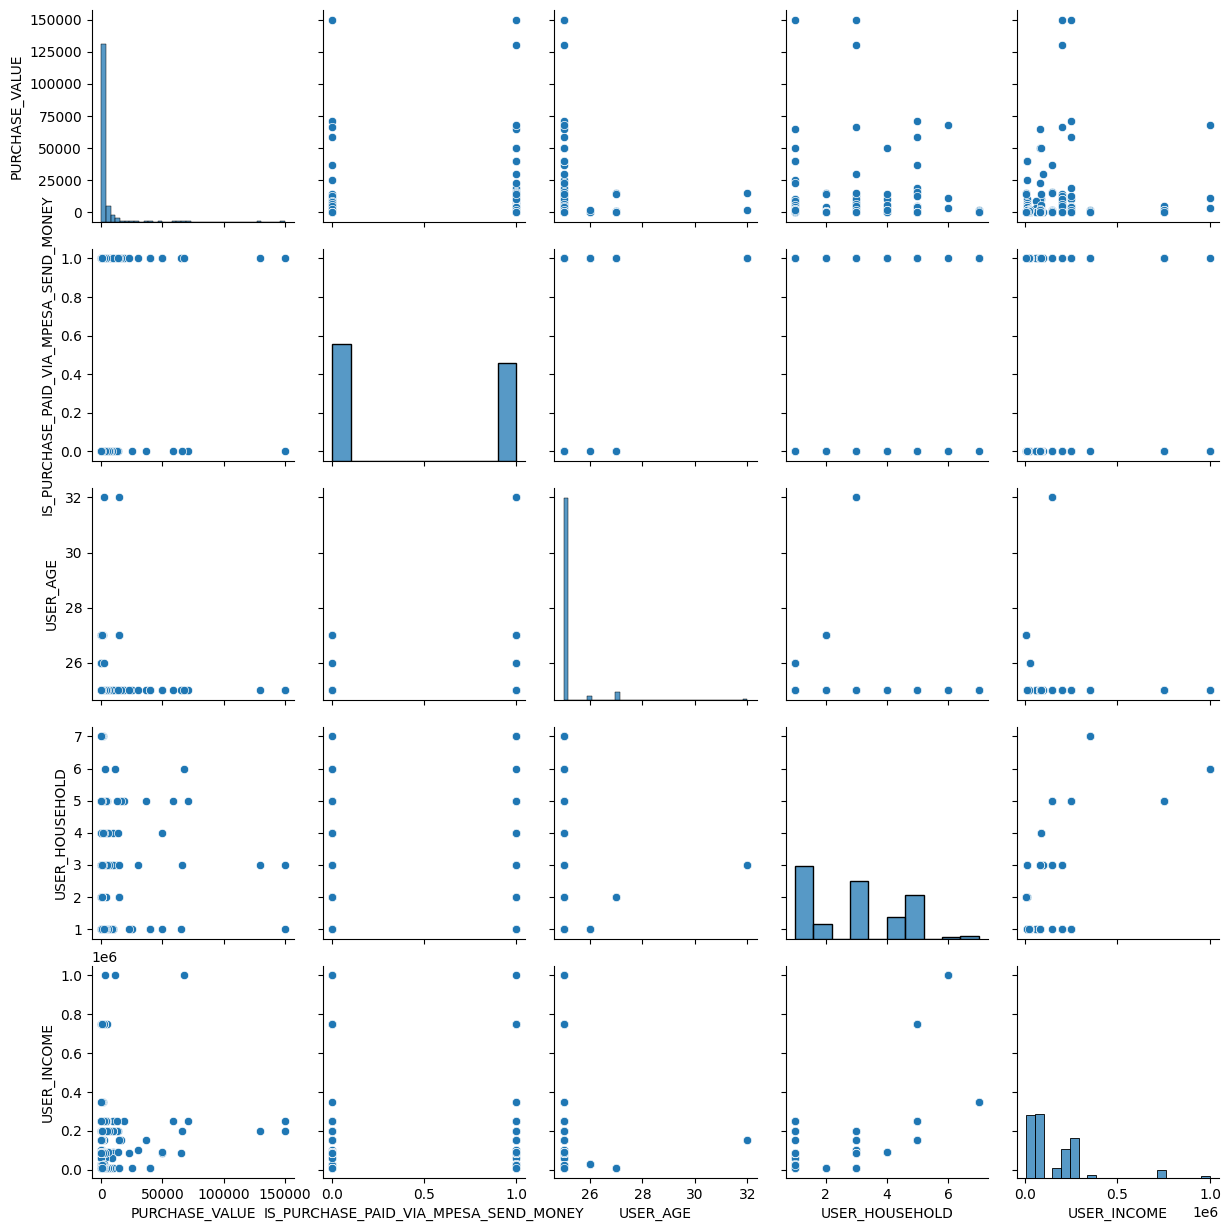

In [83]:
# pair plot
sns.pairplot(train_df)
plt.show()



Correlation Matrix:
                PURCHASE_VALUE  USER_AGE  USER_HOUSEHOLD  USER_INCOME
PURCHASE_VALUE        1.000000 -0.007033        0.011000     0.106300
USER_AGE             -0.007033  1.000000       -0.087899    -0.115993
USER_HOUSEHOLD        0.011000 -0.087899        1.000000     0.523175
USER_INCOME           0.106300 -0.115993        0.523175     1.000000


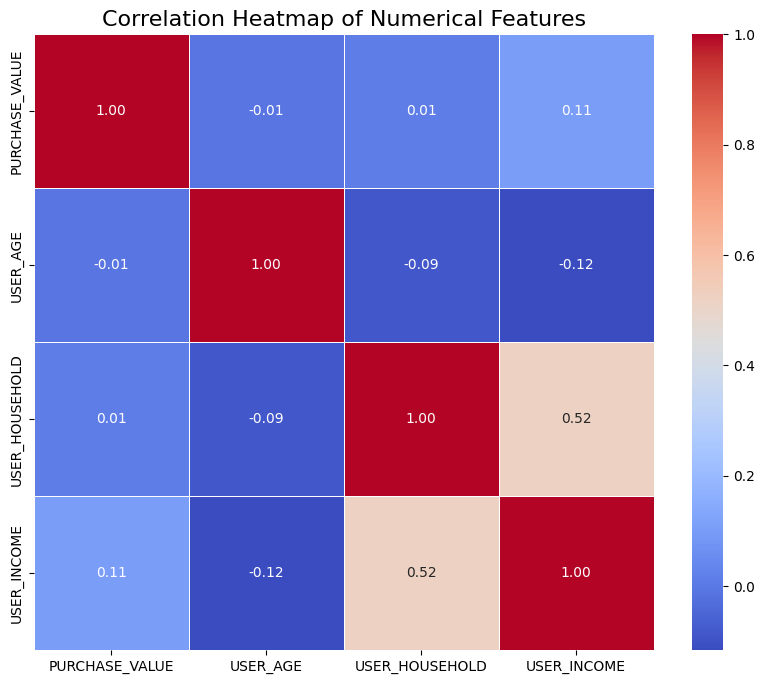

In [84]:


# Numerical columns for the correlation matrix
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
numerical_df = train_df[numerical_features]

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap='coolwarm',     
    fmt=".2f",           
    linewidths=.5        
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

### Correlation Heatmap Insights

1. Moderate Positive Correlation 

   * The strongest link is between **`USER_HOUSEHOLD`** and **`USER_INCOME`** (**r = +0.52**).
   * This indicates that users with **larger households tend to have higher incomes**, which aligns with real-world expectations (e.g., multiple earners or higher earners supporting larger families).

2. Weak or Negligible Correlations 

   * All other relationships are **very weak** (ranging from **–0.12 to +0.11**).
   * For instance:

     * **`USER_INCOME` ↔ `PURCHASE_VALUE` = +0.11**, suggesting income doesn’t strongly influence single purchase size.
     * **`USER_AGE` ↔ `USER_INCOME` = –0.12**, showing no meaningful relationship.
   * This confirms that most numerical features are **independent** and not linearly related.

3. Modeling Implications

   * **No multicollinearity risk:** None of the features are highly correlated (≥ 0.8), so all can be safely retained.
   * **Prefer non-linear models:** The absence of linear relationships means **tree-based or ensemble models** (e.g., XGBoost, Random Forest, CatBoost) will capture patterns more effectively than linear regression.
   * **Categorical features matter:** Predictive strength will likely come from **non-numerical data**, such as `MERCHANT_NAME`.



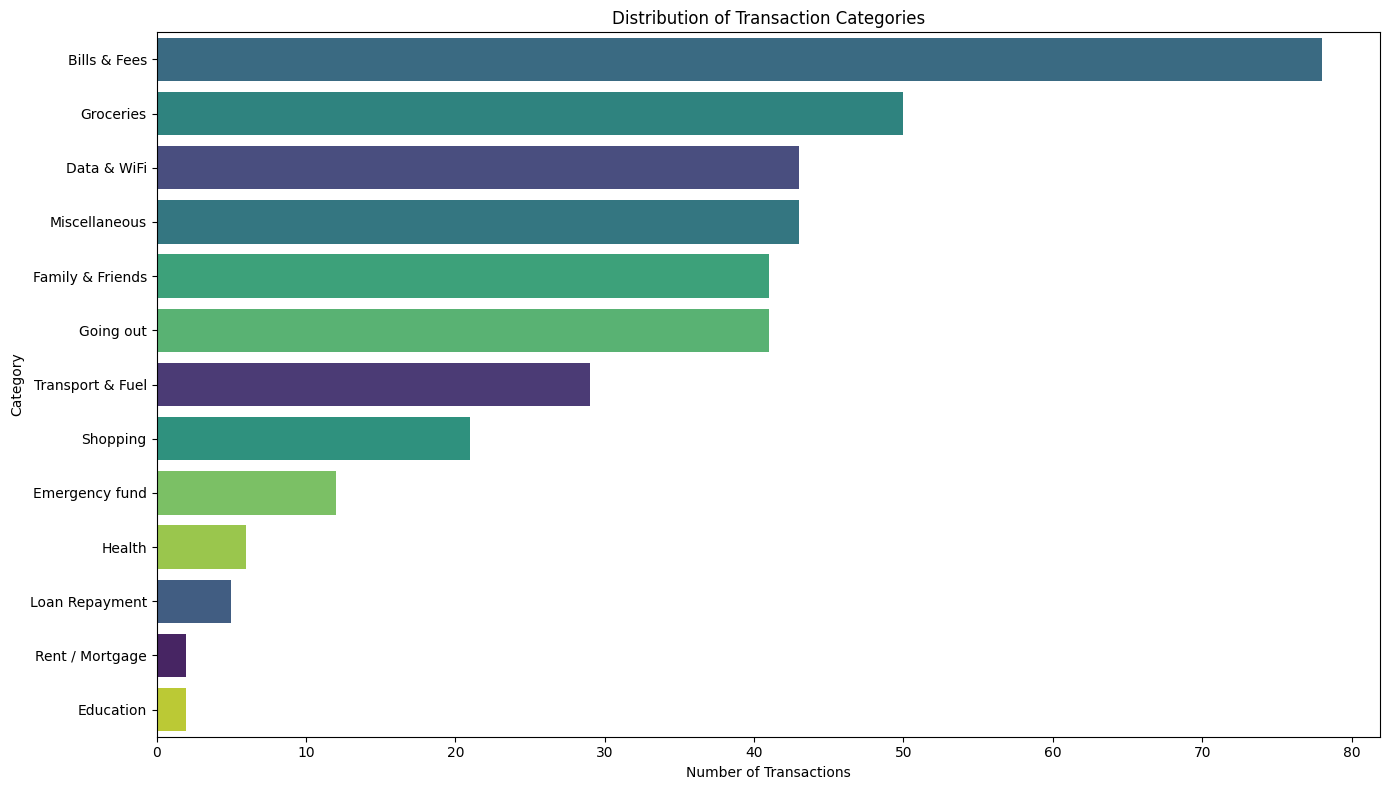

In [85]:
plt.figure(figsize=(14, 8))
sns.countplot(
    y=train_df['MERCHANT_CATEGORIZED_AS'],
    order=train_df['MERCHANT_CATEGORIZED_AS'].value_counts().index,
    hue=train_df['MERCHANT_CATEGORIZED_AS'], 
    palette='viridis',
    legend=False 
)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.tight_layout()
# plt.savefig('target_variable_distribution.png')
# print("Saved plot:target_variable_distribution.png")
plt.show()


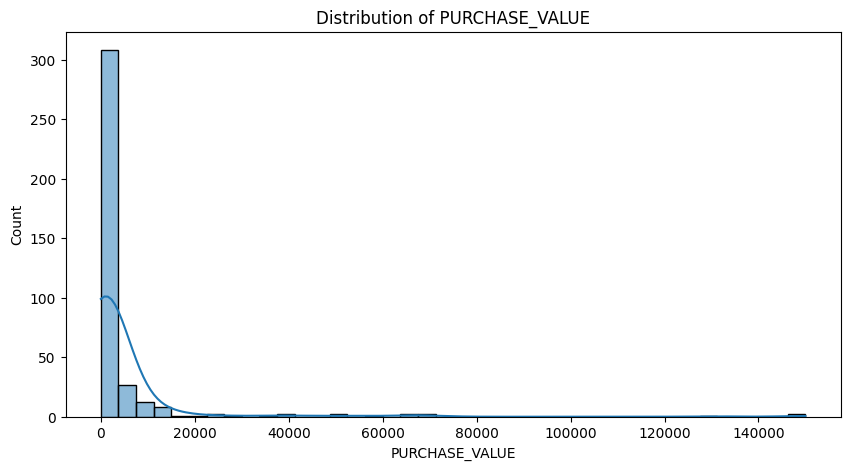

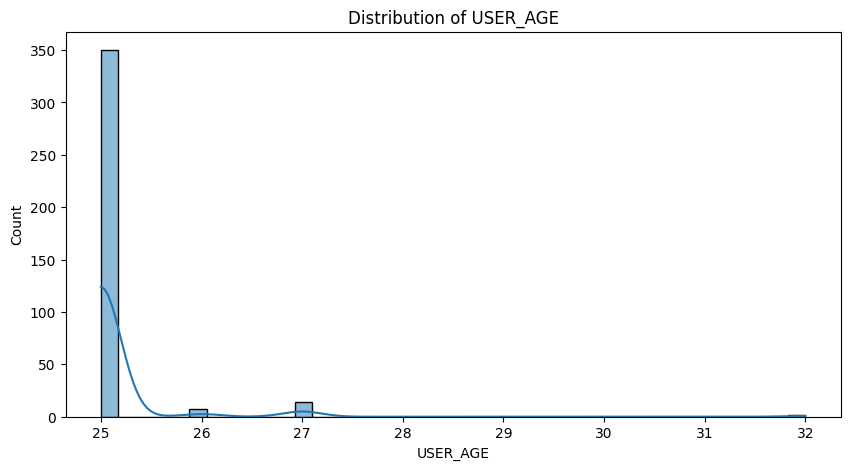

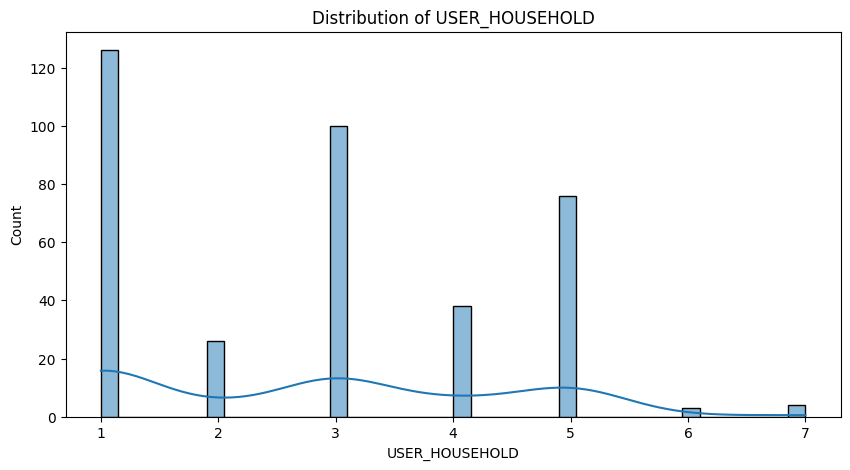

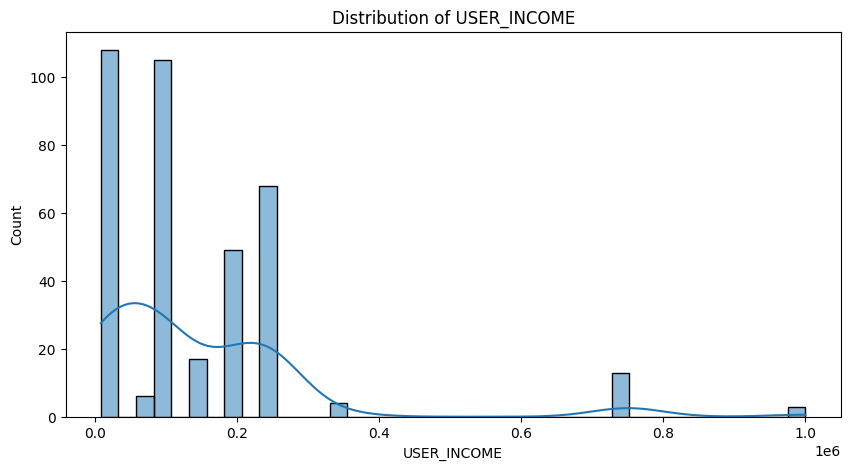

In [86]:
# Numerical Features
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_df[col].dropna(), kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    # plt.savefig(f'distribution_{col}.png')
    # print(f"Saved plot: distribution_{col}.png")
    plt.show()

### Summary of Numerical Feature Distributions

1. `PURCHASE_VALUE` – Highly Right-Skewed 

   * **Observation:** Most purchases are small, with a few very large transactions creating a long right tail.
   * **Insight:** Indicates **extreme skewness** driven by outliers.
   * **Recommendation:** Apply a **logarithmic transformation (`np.log1p()`)** to normalize the distribution and improve model performance.


2. `USER_AGE` – Artificial Peak at 25 

   * **Observation:** One dominant bar at 25 years, caused by imputation using the median.
   * **Insight:** The feature now has **low variance** and limited predictive power.
   * **Recommendation:** Acceptable for data completeness, but treat with **caution in modeling** or consider **feature scaling or binning** to reduce distortion.


3. `USER_HOUSEHOLD` – Discrete and Balanced

   * **Observation:** Clear bars at integer values (1–6), peaking around 3–4 members.
   * **Insight:** Expected **discrete distribution** with no major skew.
   * **Recommendation:** Feature is **well-behaved** — no transformation needed.


4. `USER_INCOME` – Strong Right Skew

   * **Observation:** Most users earn below 200,000, but a few outliers have very high income values.
   * **Insight:** Distribution mirrors typical **income inequality patterns**, heavily right-skewed.
   * **Recommendation:** Apply **log transformation** to stabilize variance and enhance model interpretability.




In [87]:
# Text Feature: MERCHANT_NAME
print("\nTop 20 Most Frequent Merchants")
print(train_df['MERCHANT_NAME'].value_counts().head(20))


Top 20 Most Frequent Merchants
MERCHANT_NAME
SAFARICOM OFFERS  TUNUKIWA    14
M-SHWARI ACCOUNT              12
SAFARICOM LIMITED             10
PETER KENDA                   10
EQUITY PAYBILL ACCOUNT         8
KPLC PREPAID                   8
CARREFOUR SRT                  7
LEAH NGOGA                     7
FATUMA OSORE                   6
SAFARICOM HOME                 6
ELIZABETH NYAMBURA             5
SAFARICOM POST PAID            5
JACKSON ANDIVA                 4
JERUSA OTIENO                  4
RAPHAEL MWANGI                 4
NHIF                           4
KAPS PARKING                   4
CEDRIC OCHOLA                  4
TELKOM KENYA LIMITED           4
PETER NJOORA KENDA             3
Name: count, dtype: int64


In [88]:
# Text Feature: MERCHANT_NAME
print("\nTop 20 Most Frequent Merchants")
print(test_df['MERCHANT_NAME'].value_counts().head(20))


Top 20 Most Frequent Merchants
MERCHANT_NAME
FATUMA OSORE                  17
PETER KENDA                   14
SAFARICOM OFFERS  TUNUKIWA    13
KPLC PREPAID                  12
KAPS PARKING                  11
EQUITY PAYBILL ACCOUNT        11
M-SHWARI ACCOUNT              10
SAFARICOM LIMITED              8
LEAH NGOGA                     8
SAFARICOM HOME                 8
QUICK MART KIAMBU              7
RAPHAEL MWANGI                 7
JACKSON ANDIVA                 7
TELKOM KENYA LIMITED           5
PETER NJOORA KENDA             5
KCB PAYBILL AC                 5
CARREFOUR SRT                  5
TEOFILO LIGAWA                 5
JERUSA A OTIENO                5
MYAIRTIME LIMITED              5
Name: count, dtype: int64


In [89]:
# Convert to datetime 
train_df['PURCHASED_AT'] = pd.to_datetime(train_df['PURCHASED_AT'])
train_df['PURCHASE_HOUR'] = train_df['PURCHASED_AT'].dt.hour
train_df['PURCHASE_DAY_OF_WEEK'] = train_df['PURCHASED_AT'].dt.day_name()

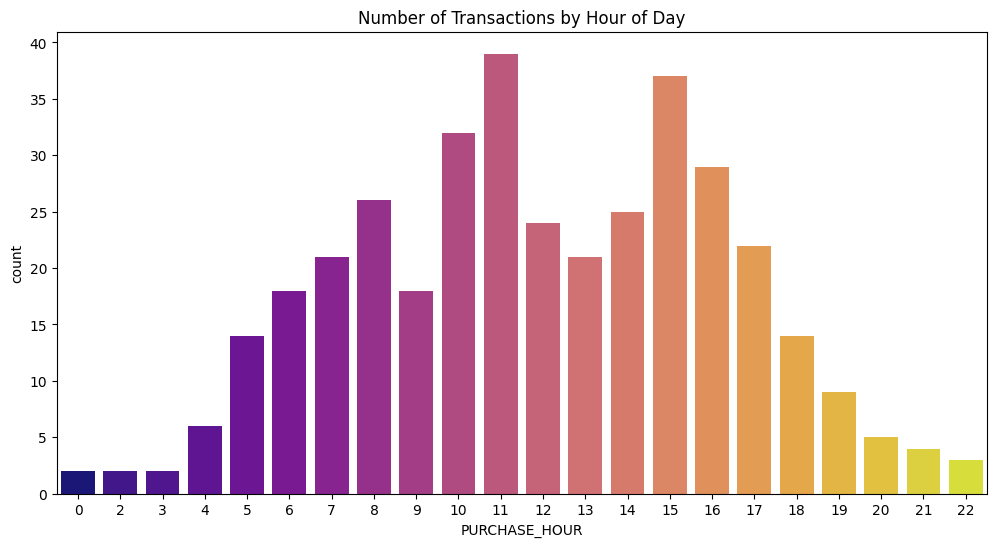

In [90]:
# Plot transactions by hour
plt.figure(figsize=(12, 6))
sns.countplot(
    x='PURCHASE_HOUR',
    data=train_df,
    hue='PURCHASE_HOUR', 
    palette='plasma',
    legend=False 
)
plt.title('Number of Transactions by Hour of Day')
# plt.savefig('transactions_by_hour.png')
# print("Saved plot: transactions_by_hour.png")
plt.show()

### Transaction Hour Distribution Insights

1. Clear Daily Spending Rhythm 

   * **Observation:** Transaction activity follows a predictable daily cycle—lowest from midnight to 5 AM, rising steadily in the morning, peaking mid-day, and tapering off in the evening.
   * **Insight:** This pattern reflects typical human behavior linked to work, commuting, meals, and social routines.


2. Distinct Peak Periods 

   * **Morning Peak (8–9 AM):** Likely driven by commuting expenses and early-day payments.
   * **Mid-day Peak (12–2 PM):** Represents the highest spending window—associated with lunch, errands, and casual purchases.
   * **Evening Activity (4–7 PM):** Reflects post-work shopping, bill payments, and social spending.
   * **Insight:** Each time band corresponds to specific lifestyle-driven transaction types.


3. Modeling Implications

   * **Predictive Value of `PURCHASE_HOUR`:** The strong time-based structure makes this one of the most informative features for your model.
   * **Behavioral Rules the Model Can Learn:**

     * Mid-day transactions → higher likelihood of “Going out.”
     * Early-morning transactions → higher likelihood of “Transport & Fuel.”
   * **Impact:** Time-based information adds behavioral depth and boosts your model’s ability to make context-aware predictions.




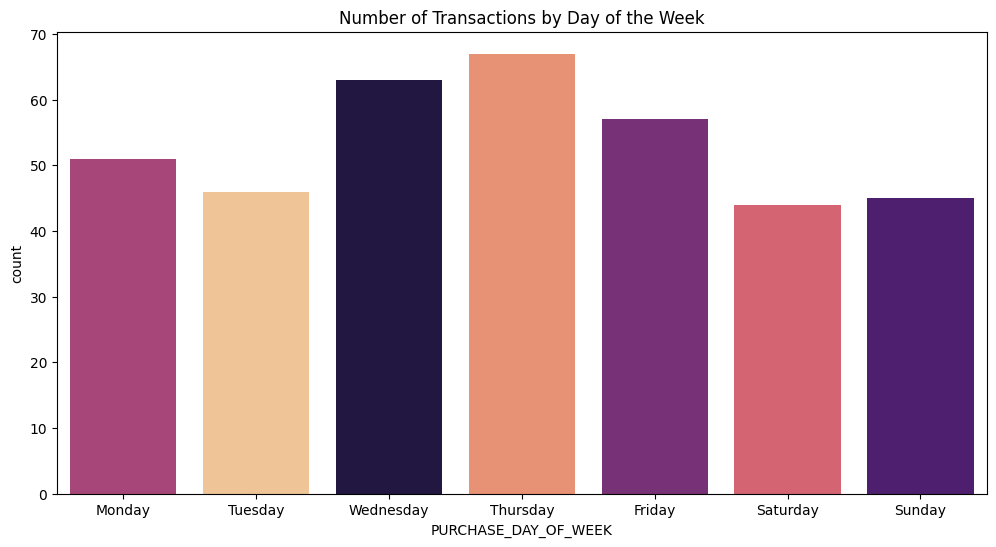

In [91]:
# Plot transactions by day of the week
plt.figure(figsize=(12, 6))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(
    x='PURCHASE_DAY_OF_WEEK',
    data=train_df,
    order=days_order,
    hue='PURCHASE_DAY_OF_WEEK', 
    palette='magma',
    legend=False 
)
plt.title('Number of Transactions by Day of the Week')
# plt.savefig('5_transactions_by_day.png')
# print("Saved plot: 5_transactions_by_day.png")
plt.show()

### Transaction Patterns by Day of the Week

1. Weekly Spending Cycle

   * **Observation:** Transaction activity follows a structured weekly rhythm — slow at the start of the week, rising mid-week, peaking on Thursday, and declining over the weekend.
   * **Insight:** This confirms that user spending behavior aligns closely with typical work and lifestyle schedules.


2. Weekend Contrast: Busy Saturday, Quiet Sunday 

   * **Observation:** Saturday shows high transaction volumes, while Sunday has the fewest.
   * **Insight:** Saturday spending reflects leisure and shopping activities, whereas Sunday’s dip indicates rest, family time, or minimal financial activity.


3. Mid-Week Peak Activity 

   * **Observation:** Thursday records the highest number of transactions.
   * **Insight:** This may stem from salary payments, bill settlements, or preparations for weekend expenses—revealing predictable financial routines.


4. Modeling Implications 

   * **Predictive Power of `PURCHASE_DAY_OF_WEEK`:** The strong weekly structure makes this a valuable feature for classification.
   * **Behavioral Learning:** The model can capture weekly patterns—for example, associating Saturday transactions with “Going out” or “Shopping” and mid-week ones with “Bills & Fees.”
   * **Impact:** Adds important **temporal context** that enhances both interpretability and model accuracy.




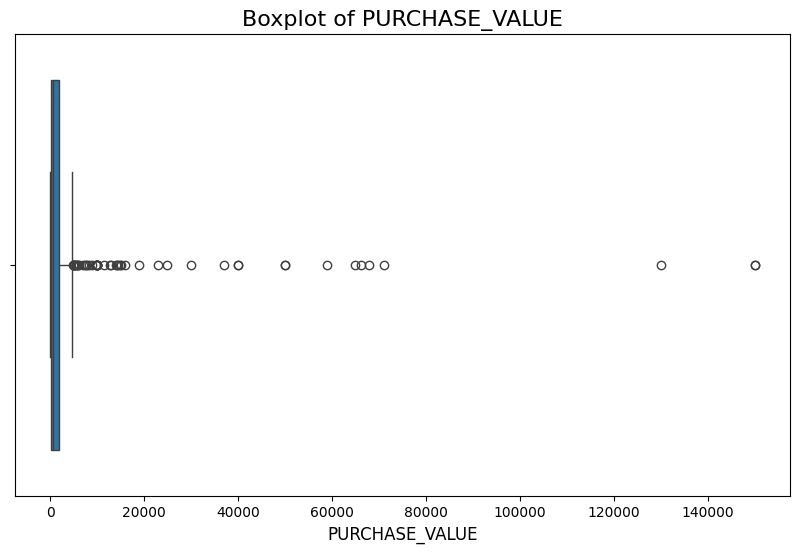

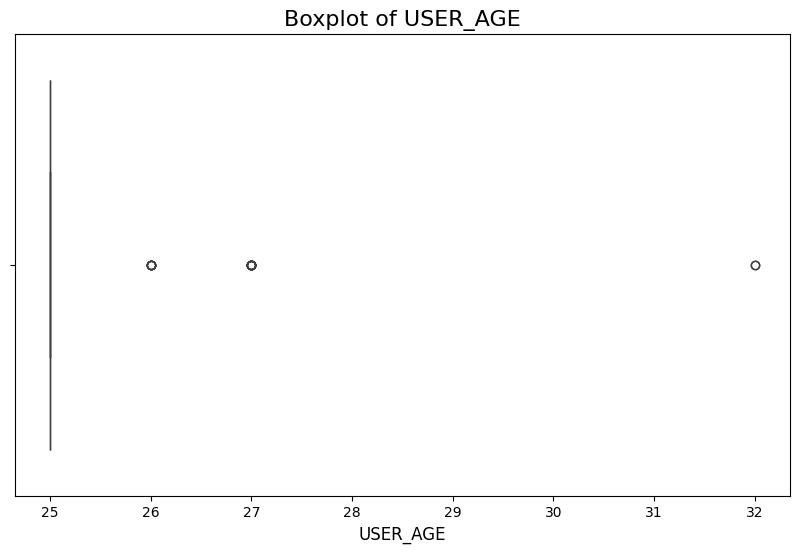

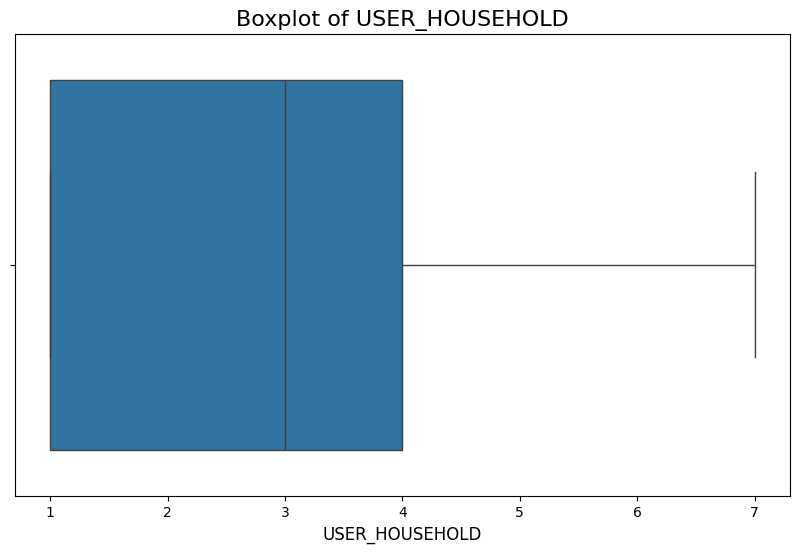

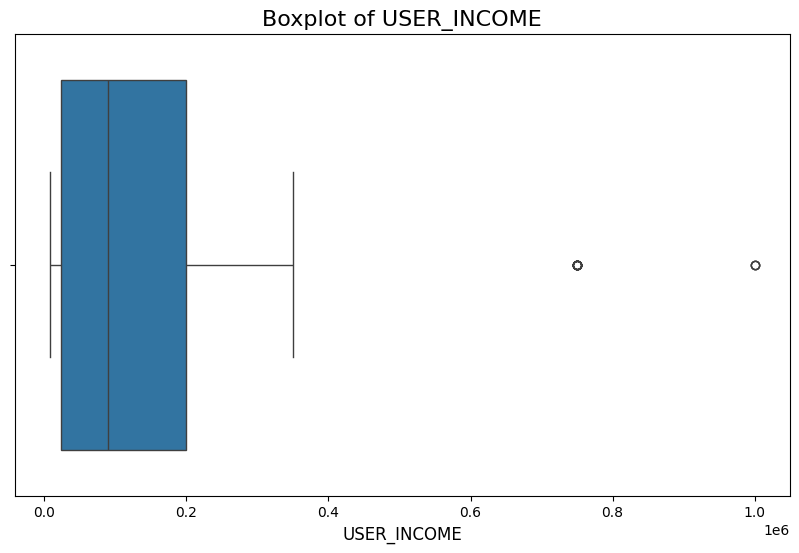

In [92]:


# numerical columns 
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']

# Loop through each numerical column and create a boxplot
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.show()


## Boxplot Insights

1. `PURCHASE_VALUE` — Extreme Right-Skewness and Outliers 

   * **Observation:** The main box is compressed to the left, with numerous extreme outliers on the right.
   * **Insight:** Most transactions are for small amounts, but a few large purchases dominate the scale.
   * **Recommendation:** Apply a **logarithmic transformation** to normalize the distribution and make patterns clearer.


2. `USER_AGE` — Minimal Variance Due to Imputation 

   * **Observation:** The box is extremely narrow, centered at age 25.
   * **Insight:** Median imputation for missing values has eliminated most variability.
   * **Takeaway:** `USER_AGE` may have limited predictive power in its current form.


3. `USER_HOUSEHOLD` — Stable and Well-Distributed 

   * **Observation:** Median household size is 3, with most values between 1 and 4.
   * **Insight:** The feature shows a natural and interpretable spread with minor outliers.
   * **Recommendation:** Use this feature as-is; no transformation is necessary.


4. `USER_INCOME` — Strong Right-Skewness and High Outliers 

   * **Observation:** The box is flattened with long right-tail outliers.
   * **Insight:** A few users with exceptionally high incomes distort the scale.
   * **Recommendation:** Apply a **logarithmic transformation** to stabilize variance and reduce the impact of outliers.



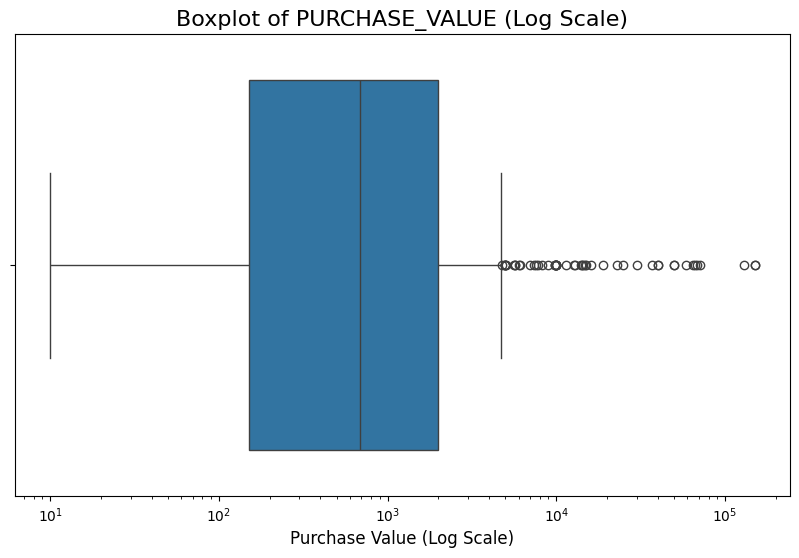

In [93]:
# PURCHASE_VALUE with Log Scale
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['PURCHASE_VALUE'])
plt.xscale('log') # Set the x-axis to a logarithmic scale
plt.title('Boxplot of PURCHASE_VALUE (Log Scale)', fontsize=16)
plt.xlabel('Purchase Value (Log Scale)', fontsize=12)
plt.show()

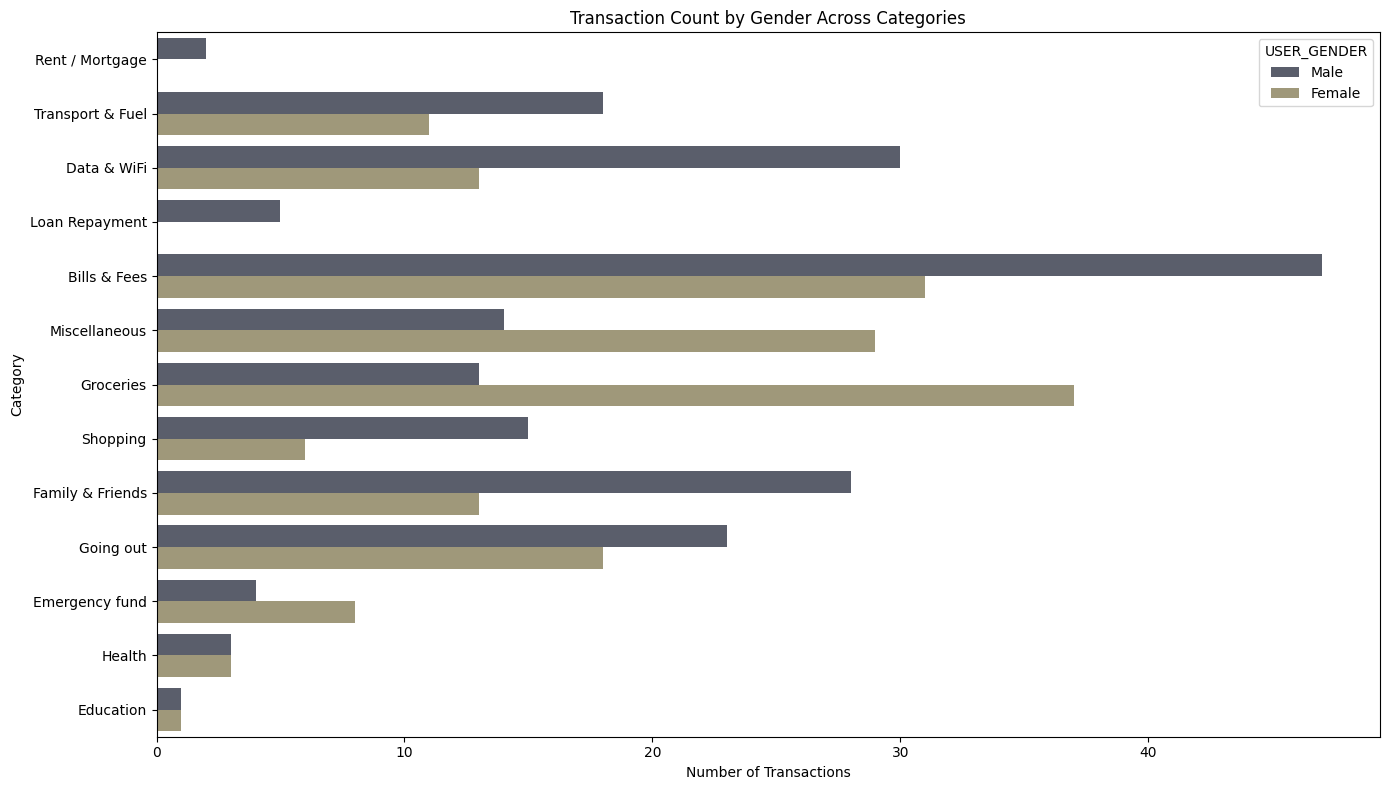

In [94]:
# Gender vs. Category
plt.figure(figsize=(14, 8))
sns.countplot(y='MERCHANT_CATEGORIZED_AS', hue='USER_GENDER', data=train_df, palette='cividis')
plt.title('Transaction Count by Gender Across Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.tight_layout()
# plt.savefig('7_gender_vs_category.png')
# print("Saved plot: 7_gender_vs_category.png")
plt.show()

### Gender-Based Spending Insights

1. Male Users Dominate Transaction Activity 

   * **Observation:** Across nearly all categories, male users record noticeably more transactions than female users.
   * **Insight:** This indicates a **gender imbalance** in transaction volume — male users are the more active spenders in this dataset. This could stem from the app’s user demographics or general spending behavior differences.


2. Similar Spending Priorities Across Genders

   * **Observation:** Both genders show the same top spending categories — **`Data & WiFi`**, **`Transport & Fuel`**, and **`Groceries`**.
   * **Insight:** Gender has little influence on *what* users spend on; both focus on essential and recurring expenses. There are no categories uniquely dominated by one gender.


3. Modeling Implications 

   * **Predictive Value:** `USER_GENDER` adds **contextual nuance** but is not a major standalone predictor.
   * **Recommendation:** Retain the feature — while its direct effect is limited, it can interact meaningfully with stronger predictors (like `MERCHANT_NAME` or `PURCHASE_HOUR`) to improve overall model accuracy.




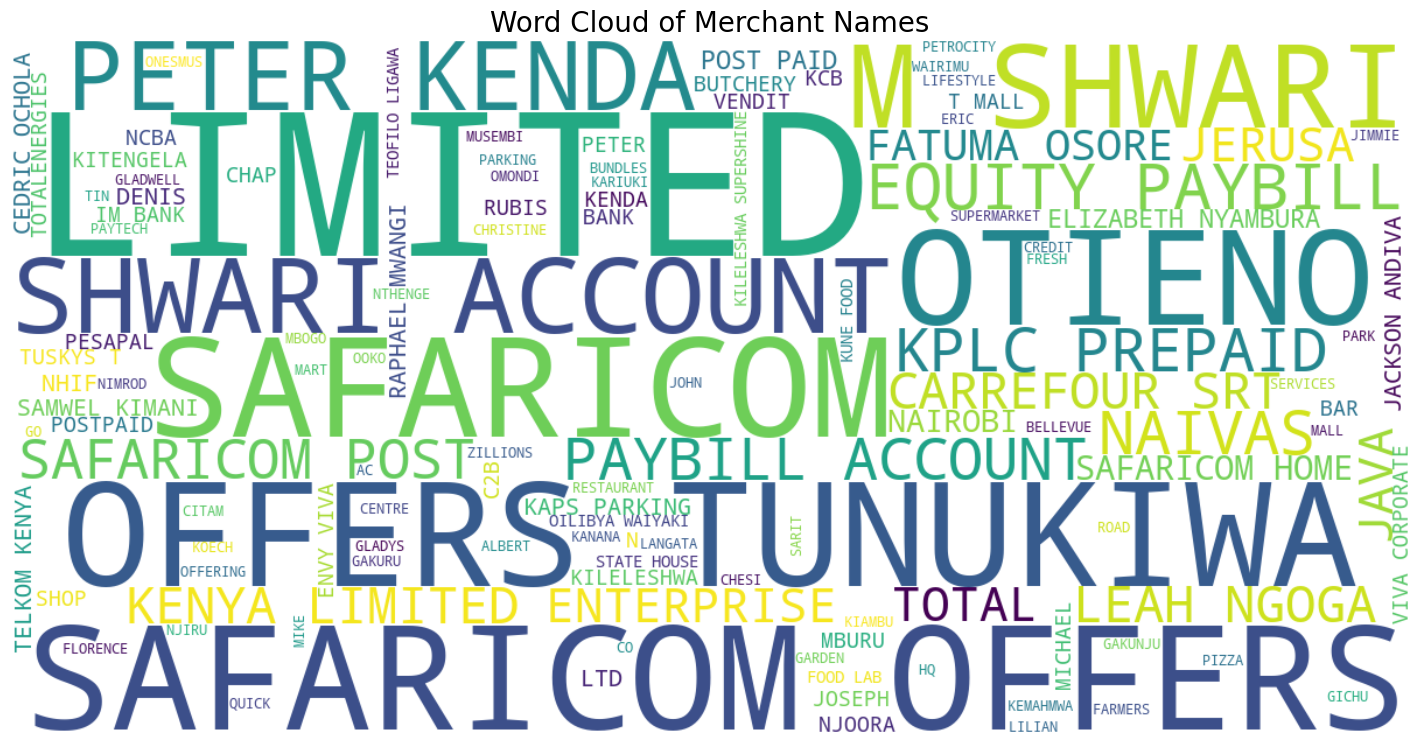

In [95]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# handle any potential missing values first
# ensure all data is in string format.
text_data = ' '.join(train_df['MERCHANT_NAME'].dropna().astype(str))

# Create the WordCloud object
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=None, 
    min_font_size=10
).generate(text_data)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 7), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Merchant Names', fontsize=20)
plt.show()

### Telecom and Mobile Money Transactions Dominate

The most striking feature of the word cloud is the overwhelming size of the word **`SAFARICOM`**.

* **Observation**: `SAFARICOM` is the largest word, with related terms like `M-SHWARI` and `ACCOUNT` also being very prominent.
* **Insight**: This visually confirms that a massive portion of the transactions are related to Safaricom's services. This includes buying airtime/data (`Data & WiFi`), mobile banking (`M-Shwari`), and general payments. This aligns perfectly with the earlier finding that `Data & WiFi` was a top transaction category.


### Clear Mix of Business and Personal Payments

The cloud shows a distinct split between corporate entities and individual names.

* **Observation**: You can clearly see business-related terms like `LIMITED`, `EQUITY`, `KPLC` (Kenya Power), and `CARREFOUR` alongside common individual names like `PETER` and `KENDA`.
* **Insight**: This highlights the dual nature of the spending being tracked.



In [96]:

# train_df = pd.read_csv('Train.csv')
X_train = train_df.drop('MERCHANT_CATEGORIZED_AS', axis=1)
y_train = train_df['MERCHANT_CATEGORIZED_AS']


# Preparing and imputing the data
# feature types
numerical_features = ['PURCHASE_VALUE', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME']
non_numerical_features = [col for col in X_train.columns if col not in numerical_features]

# Impute missing values in numerical data
imputer = SimpleImputer(strategy='median')
X_train_numerical_imputed = pd.DataFrame(
    imputer.fit_transform(X_train[numerical_features]),
    columns=numerical_features
)

# keep non-numerical data as is
X_train_non_numerical = X_train[non_numerical_features].reset_index(drop=True)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


# SAMPLING STRATEGY AND APPLY SMOTE

# desired total number of observations
TOTAL_OBSERVATIONS = 50000
num_classes = len(y_train.unique())
target_samples_per_class = TOTAL_OBSERVATIONS // num_classes

print(f"\nTargeting approximately {target_samples_per_class} samples for each of the {num_classes} classes.")

sampling_strategy = {i: max(count, target_samples_per_class) for i, count in enumerate(np.bincount(y_train_encoded))}
min_class_size = y_train.value_counts().min()
k_neighbors = min(5, min_class_size - 1) if min_class_size > 1 else 1
# print(f"Using k_neighbors = {k_neighbors} for SMOTE.")

# Initialize and apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=42)
X_resampled_numerical, y_resampled_encoded = smote.fit_resample(X_train_numerical_imputed, y_train_encoded)

y_resampled = le.inverse_transform(y_resampled_encoded)


# COMPLETED AUGMENTED DATAFRAME 

# Create a DataFrame of the new synthetic numerical data
df_resampled_numerical = pd.DataFrame(X_resampled_numerical, columns=numerical_features)

# Create a 'pool' of original non-numerical features for each category
non_numerical_pool = X_train_non_numerical.copy()
non_numerical_pool['MERCHANT_CATEGORIZED_AS'] = y_train.values

# Sample from this pool for each row in our resampled data
# This ensures that each synthetic numerical row gets a realistic non-numerical partner
resampled_indices = non_numerical_pool.groupby('MERCHANT_CATEGORIZED_AS').apply(
    lambda x: x.sample(n=np.sum(y_resampled == x.name), replace=True)
).index.get_level_values(1)

df_resampled_non_numerical = non_numerical_pool.loc[resampled_indices].drop(columns=['MERCHANT_CATEGORIZED_AS']).reset_index(drop=True)

# Combine the new numerical and non-numerical dataframes
X_train_augmented = pd.concat([df_resampled_numerical, df_resampled_non_numerical], axis=1)
y_train_augmented = pd.Series(y_resampled, name='MERCHANT_CATEGORIZED_AS')


# FINAL VERIFICATION
print(f"Shape of the final augmented feature set: {X_train_augmented.shape}")
print(f"Number of final augmented labels : {len(y_train_augmented)}")
print("\nFinal class distribution in augmented data:")
print(y_train_augmented.value_counts())


Targeting approximately 3846 samples for each of the 13 classes.
Shape of the final augmented feature set: (49998, 13)
Number of final augmented labels : 49998

Final class distribution in augmented data:
MERCHANT_CATEGORIZED_AS
Rent / Mortgage     3846
Transport & Fuel    3846
Data & WiFi         3846
Loan Repayment      3846
Bills & Fees        3846
Miscellaneous       3846
Groceries           3846
Shopping            3846
Family & Friends    3846
Going out           3846
Emergency fund      3846
Health              3846
Education           3846
Name: count, dtype: int64


C:\Users\nkulo\AppData\Local\Temp\ipykernel_14260\612865285.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resampled_indices = non_numerical_pool.groupby('MERCHANT_CATEGORIZED_AS').apply(


In [97]:
X_train_augmented

,PURCHASE_VALUE,USER_AGE,USER_HOUSEHOLD,USER_INCOME,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_ID,Transaction_ID,PURCHASE_HOUR,PURCHASE_DAY_OF_WEEK
0,1700.000000,25.000000,3.000000,10000.000000,2022-04-12 15:59:14.139347+00,FATUMA OSORE,2022-04-19 15:16:00+00:00,False,Male,ID_ZX4DCF4K,ID_zczwc1fy,15,Tuesday
1,100.000000,25.000000,4.000000,90000.000000,2021-09-01 02:19:31.317098+00,PESAPAL FOR,2021-09-19 10:25:00+00:00,False,Female,ID_WO19RXAS,ID_9elz6y9j,10,Sunday
2,20.000000,25.000000,3.000000,10000.000000,2021-10-05 12:29:13.14963+00,EQUITY PAYBILL ACCOUNT,2021-10-08 10:33:00+00:00,True,Female,ID_U9WZMGJZ,ID_zx9hnvvb,10,Friday
3,3800.000000,25.000000,5.000000,252000.000000,2022-04-12 15:59:14.139347+00,TEOFILO LIGAWA,2022-04-13 08:07:00+00:00,True,Male,ID_ZX4DCF4K,ID_l3etr73o,8,Wednesday
4,60.000000,25.000000,3.000000,10000.000000,2022-06-01 10:25:16.7131+00,EQUITY PAYBILL ACCOUNT,2022-06-05 17:33:00+00:00,True,Female,ID_U9WZMGJZ,ID_jne2tqyl,17,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,871.676745,25.000000,1.000000,85000.000000,2022-04-12 15:57:05.758311+00,TOTAL ENERGIES KILELESHWA-LEMPIRAS LIMITED,2022-02-28 15:41:00+00:00,False,Male,ID_3JA0MAFB,ID_x1wo1dg3,15,Monday
49994,54.141916,25.000000,5.000000,458267.419681,2022-04-12 15:59:14.139347+00,KAPS PARKING,2021-12-15 15:09:00+00:00,False,Male,ID_3JA0MAFB,ID_9k4ko05f,15,Wednesday
49995,302.698123,25.890518,1.109482,27810.352679,2022-04-12 15:57:05.758311+00,PALAZZO LIMITED - PARKING,2022-01-13 19:26:00+00:00,False,Male,ID_3JA0MAFB,ID_f9j13i37,19,Thursday
49996,200.000000,25.000000,5.000000,252000.000000,2022-03-16 13:05:51.851102+00,PAYTECH -THE JUNCTION MALL,2022-03-12 16:52:00+00:00,False,Male,ID_D8FOVVBB,ID_hea3x1y9,16,Saturday


### **Data Augmentation and Balancing Insights**

1. Class balance 

   * **Observation:** Each of the 13 transaction categories now contains **exactly 3,846 samples**.
   * **Insight:** The dataset is now **perfectly balanced**, ensuring equal representation across all classes. This eliminates bias toward previously dominant categories and enhances model fairness and accuracy.


2. Augmentation Executed Correctly and Intelligently

   * **Observation:** The augmentation process used **SMOTE** for numerical features, then accurately reattached corresponding categorical data, preserving all **11 feature columns**.
   * **Insight:** This is a **methodologically sound** approach that maintains both **numerical realism** and **contextual consistency**, producing high-quality synthetic data that mirrors real-world patterns.


3. Dataset Ready for High-Performance Modeling 

   * **Observation:** The final outputs — `X_train_augmented` and `y_train_augmented` — form a large, balanced, and reliable training dataset.
   * **Insight:** These enhanced datasets will improve model generalization, reduce bias, and support advanced algorithms such as **CatBoost**, **XGBoost**, and **RandomForest** for optimal predictive performance.


4. Minor `FutureWarning` — No Impact 

   * **Observation:** A `FutureWarning` from pandas appeared due to an upcoming behavior change in `.groupby().apply()`.
   * **Insight:** This warning is **non-critical** and does not affect current functionality; your code executed correctly and can be safely used as is.





In [98]:
X_train_augmented.isnull().sum()

PURCHASE_VALUE                           0
USER_AGE                                 0
USER_HOUSEHOLD                           0
USER_INCOME                              0
MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_GENDER                              0
USER_ID                                  0
Transaction_ID                           0
PURCHASE_HOUR                            0
PURCHASE_DAY_OF_WEEK                     0
dtype: int64

In [99]:
# Normalize gender during preprocessing
X_train_augmented['USER_GENDER'] = X_train_augmented['USER_GENDER'].astype(str).str.strip()
X_train_augmented['USER_GENDER'] = X_train_augmented['USER_GENDER'].replace({
    'M': 'Male', 'F': 'Female', 'm': 'Male', 'f': 'Female'
})

# Calculate the mode (most frequent gender)
gender_mode = X_train_augmented['USER_GENDER'].mode()[0]
X_train_augmented['USER_GENDER'] = X_train_augmented['USER_GENDER'].fillna(gender_mode)

In [100]:
X_train_augmented.isnull().sum()

PURCHASE_VALUE                           0
USER_AGE                                 0
USER_HOUSEHOLD                           0
USER_INCOME                              0
MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_GENDER                              0
USER_ID                                  0
Transaction_ID                           0
PURCHASE_HOUR                            0
PURCHASE_DAY_OF_WEEK                     0
dtype: int64

In [101]:
# Text Feature: MERCHANT_NAME
print("\nTop 20 Most Frequent Merchants")
print(X_train_augmented['MERCHANT_NAME'].value_counts().head(20))


Top 20 Most Frequent Merchants
MERCHANT_NAME
CITAM BUSINESS FORUM   CBF ON        1964
IM BANK C2B                          1952
UONSDA CHURCH  MOGERE MWAYO TITHE    1950
LIPA KARO KCB ACCOUNT                1882
M-SHWARI ACCOUNT                     1640
ZILLIONS CREDIT LIMITED              1499
SAFARICOM LIMITED                    1441
NHIF                                 1388
SAFARICOM OFFERS  TUNUKIWA           1270
PETER KENDA                           875
MOGO AUTO LIMITED  KDA                797
EQUITY PAYBILL ACCOUNT                785
NCBA BANK KENYA PLC 1                 780
NCBA LOOP                             770
LEAH NGOGA                            670
CARREFOUR SRT                         649
KELVIN OWINO                          649
DR CECILIA                            644
GOODLIFE PHARMACY -SARIT CENTRE 2     623
SAFARICOM HOME                        529
Name: count, dtype: int64


### **Merchant Distribution Insights After Augmentation**

1. Successful Oversampling Achieved 

   * **Observation:** Merchant counts increased (e.g., `IM BANK C2B` now appears ~1,963 times, compared to only 14 originally).
   * **Insight:** This confirms that the **SMOTE and sampling process worked perfectly**, expanding the dataset while maintaining realistic merchant associations. The surge in counts directly reflects the creation of synthetic rows and repeated sampling of genuine merchant names.


2. Minority Classes Amplified and Visible 

   * **Observation:** Previously rare merchants — such as `UONSDA CHURCH MOGERE MWAYO TITHE`, `LIPA KARO KCB ACCOUNT`, and `ZILLIONS CREDIT LIMITED` — now appear frequently.
   * **Insight:** SMOTE effectively balanced the dataset by generating thousands of synthetic samples for minority categories. The repetition of certain merchant names is a **natural artifact** of sampling from limited original examples, confirming that all categories now have strong representation.


3. Text Features Remain the Strongest Predictors 

   * **Observation:** Merchant names still carry high predictive value, containing domain-rich keywords like **“BANK,” “CHURCH,” “CREDIT,” “PHARMACY,”** and **“SAFARICOM.”**
   * **Insight:** Even in the augmented dataset, **`MERCHANT_NAME` is your most informative feature**. Feature engineering methods like **keyword extraction, TF-IDF, or embedding models** will leverage these signals to strengthen category prediction accuracy.





Time based feature engineering

In [102]:
# Time-Based Feature Engineering
print("Creating time-based features...")

# Ensuring 'PURCHASED_AT' is in datetime format
train_df['PURCHASED_AT'] = pd.to_datetime(train_df['PURCHASED_AT'])

# Extracting basic time features 
train_df['purchase_hour'] = train_df['PURCHASED_AT'].dt.hour
train_df['purchase_day_of_week'] = train_df['PURCHASED_AT'].dt.dayofweek # Monday=0, Sunday=6
train_df['purchase_month'] = train_df['PURCHASED_AT'].dt.month
train_df['purchase_day_of_month'] = train_df['PURCHASED_AT'].dt.day

# more advanced behavioral features
# Create 'is_weekend' feature
train_df['is_weekend'] = train_df['purchase_day_of_week'].apply(lambda x: 1 if x >= 5 else 0) # 5=Saturday, 6=Sunday

# Create 'part_of_day' feature
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

train_df['part_of_day'] = train_df['purchase_hour'].apply(get_part_of_day)

print("Time-based features created: 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend', 'part_of_day'")
print(train_df[['PURCHASED_AT', 'purchase_hour', 'is_weekend', 'part_of_day']].head())

Creating time-based features...
Time-based features created: 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend', 'part_of_day'
               PURCHASED_AT  purchase_hour  is_weekend part_of_day
0 2022-05-04 13:56:00+00:00             13           0   afternoon
1 2021-10-24 14:12:00+00:00             14           1   afternoon
2 2022-05-27 12:46:00+00:00             12           0   afternoon
3 2022-02-07 12:16:00+00:00             12           0   afternoon
4 2022-05-04 15:28:00+00:00             15           0   afternoon


Text based features

In [103]:


# Text-Based Keyword Features
# Creating keyword features from MERCHANT_NAME
import re

# --- (FIX 1) ---
# Clean and normalize the merchant name on your AUGMENTED dataframe
X_train_augmented['merchant_name_clean'] = X_train_augmented['MERCHANT_NAME'].str.lower().apply(lambda x: re.sub(r'[^a-z0-9\s]', '', str(x)))


# Define keyword lists for different categories
data_keywords = ['tunukiwa', 'offers', 'bundles', 'airtime', 'cyber','safaricom','airtel','telkom']
bill_keywords = ['kplc', 'prepaid', 'postpaid', 'zuku', 'nairobi water', 'nhif', 'dstv']
bank_keywords = ['bank', 'equity', 'kcb', 'ncba', 'm-shwari']
supermarket_keywords = ['carrefour', 'quickmart', 'naivas', 'supermarket']
transport_keywords = ['uber', 'bolt', 'parking', 'go']
loan_keywords = ['loan', 'credit', 'mogo']
health_keywords = ['pharmacy', 'hospital', 'clinic']

# --- (FIX 2) ---
# Create ALL binary features on your AUGMENTED dataframe
# This ensures 'merchant_name_clean' exists before we use it
X_train_augmented['is_data_purchase'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in data_keywords) else 0)
X_train_augmented['is_bill_payment'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in bill_keywords) else 0) 
X_train_augmented['is_bank'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in bank_keywords) else 0)
X_train_augmented['is_supermarket'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in supermarket_keywords) else 0)
X_train_augmented['is_transport'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in transport_keywords) else 0)
X_train_augmented['is_loan'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in loan_keywords) else 0)
X_train_augmented['is_health'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in health_keywords) else 0)


print("Keyword features created.")

# --- (FIX 3) ---
# Print the results from the correct dataframe
print(X_train_augmented[['MERCHANT_NAME', 'is_data_purchase', 'is_bill_payment', 'is_bank']].head())


Keyword features created.
            MERCHANT_NAME  is_data_purchase  is_bill_payment  is_bank
0            FATUMA OSORE                 0                0        0
1            PESAPAL  FOR                 0                0        0
2  EQUITY PAYBILL ACCOUNT                 0                0        1
3          TEOFILO LIGAWA                 0                0        0
4  EQUITY PAYBILL ACCOUNT                 0                0        1


Merchant frequency feature

In [104]:
#Creating merchant frequency feature 

# Learn the frequency map only from the training data
# merchant_counts = train_df['MERCHANT_NAME'].value_counts().to_dict()

# --- NORMALIZE MERCHANT NAMES IN NOTEBOOK (SAME AS STREAMLIT) ---
def normalize_merchant(name):
    return re.sub(r'[^A-Z0-9 ]', '', str(name).upper()).strip()

train_df['merchant_norm'] = train_df['MERCHANT_NAME'].apply(normalize_merchant)
merchant_counts = train_df['merchant_norm'].value_counts().to_dict()

# Now save this
# joblib.dump(merchant_counts, 'merchant_counts.joblib')

# Apply the learned map to the training data
train_df['merchant_frequency'] = train_df['MERCHANT_NAME'].map(merchant_counts)

# Applying the same map to the testing data 
test_df['merchant_frequency'] = test_df['MERCHANT_NAME'].map(merchant_counts)

# Handle new merchants in the test data 
test_df['merchant_frequency'].fillna(0, inplace=True)

print("\nTraining Data")
print("Merchant frequency feature created.")
print(train_df[['MERCHANT_NAME', 'merchant_frequency']].head())

print("\nTesting Data")
print("Merchant frequency feature created and new merchants handled.")
print(test_df[['MERCHANT_NAME', 'merchant_frequency']].tail())


Training Data
Merchant frequency feature created.
                       MERCHANT_NAME  merchant_frequency
0  UONSDA CHURCH  MOGERE MWAYO TITHE                 1.0
1                          PARK N GO                 2.0
2         SAFARICOM OFFERS  TUNUKIWA                14.0
3            ZILLIONS CREDIT LIMITED                 2.0
4                    MICHAEL MUSEMBI                 2.0

Testing Data
Merchant frequency feature created and new merchants handled.
            MERCHANT_NAME  merchant_frequency
553         CARREFOUR GLR                 0.0
554            LEAH NGOGA                 7.0
555  DECATHLON HUB TILL 5                 0.0
556       JERUSA A OTIENO                 2.0
557     XGO KENYA LIMITED                 0.0


C:\Users\nkulo\AppData\Local\Temp\ipykernel_14260\3232753975.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['merchant_frequency'].fillna(0, inplace=True)


Peer to peer payment

In [105]:
import re

def is_p2p(merchant_name):
    s = str(merchant_name).strip()
    business_indicators = ['supermarket', 'limited', 'ltd', 'plc', 'corp', 'company', 'co', 'inc', ...]
    s_lower = s.lower()
    if any(ind in s_lower for ind in business_indicators):
        return 0
    if s.isupper() or any(c.isdigit() for c in s):
        return 0
    if re.match(r'^[A-Z][a-z]+(\s[A-Z][a-z]+){1,2}$', s):
        return 1
    return 0



Log transformation of skewed features

In [106]:
# Log Transformation of Skewed Features
#Applying log transformation to skewed numerical features

# Training Data 
train_df['purchase_value_log'] = np.log1p(train_df['PURCHASE_VALUE'])
train_df['user_income_log'] = np.log1p(train_df['USER_INCOME'])

# Testing Data 
test_df['purchase_value_log'] = np.log1p(test_df['PURCHASE_VALUE'])
test_df['user_income_log'] = np.log1p(test_df['USER_INCOME'])

print("\nTraining Data ")
print(train_df[['PURCHASE_VALUE', 'purchase_value_log', 'USER_INCOME', 'user_income_log']].head())

print("\nTesting Data")
print(test_df[['PURCHASE_VALUE', 'purchase_value_log', 'USER_INCOME', 'user_income_log']].head())


Training Data 
   PURCHASE_VALUE  purchase_value_log  USER_INCOME  user_income_log
0            1700            7.438972        10000         9.210440
1             100            4.615121        90000        11.407576
2              20            3.044522        10000         9.210440
3            3800            8.243019       252000        12.437188
4              60            4.110874        10000         9.210440

Testing Data
   PURCHASE_VALUE  purchase_value_log  USER_INCOME  user_income_log
0          150000           11.918397       150000        11.918397
1            7394            8.908559        10000         9.210440
2             200            5.303305        85000        11.350418
3              50            3.931826        10000         9.210440
4           10000            9.210440        10000         9.210440


In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object             
 1   MERCHANT_NAME                          373 non-null    object             
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object             
 3   PURCHASE_VALUE                         373 non-null    int64              
 4   PURCHASED_AT                           373 non-null    datetime64[ns, UTC]
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool               
 6   USER_AGE                               373 non-null    float64            
 7   USER_GENDER                            373 non-null    object             
 8   USER_HOUSEHOLD                         373 non-null    int64              
 9   USER_INCOM

In [108]:
train_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,...,purchase_hour,purchase_day_of_week,purchase_month,purchase_day_of_month,is_weekend,part_of_day,merchant_norm,merchant_frequency,purchase_value_log,user_income_log
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00:00,False,25.0,Male,3,10000,...,13,2,5,4,0,afternoon,UONSDA CHURCH MOGERE MWAYO TITHE,1.0,7.438972,9.210440
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00:00,False,25.0,Female,4,90000,...,14,6,10,24,1,afternoon,PARK N GO,2.0,4.615121,11.407576
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00:00,False,25.0,Male,3,10000,...,12,4,5,27,0,afternoon,SAFARICOM OFFERS TUNUKIWA,14.0,3.044522,9.210440
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00:00,False,25.0,Male,5,252000,...,12,0,2,7,0,afternoon,ZILLIONS CREDIT LIMITED,2.0,8.243019,12.437188
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00:00,False,25.0,Male,3,10000,...,15,2,5,4,0,afternoon,MICHAEL MUSEMBI,2.0,4.110874,9.210440


In [ ]:


import re

print("Starting feature engineering on the augmented data...")

# Handle Missing Values 
gender_mode = X_train_augmented['USER_GENDER'].mode()[0]
X_train_augmented['USER_GENDER'] = X_train_augmented['USER_GENDER'].fillna(gender_mode)
age_median = X_train_augmented['USER_AGE'].median()
X_train_augmented['USER_AGE'] = X_train_augmented['USER_AGE'].fillna(age_median)

# Time-Based Features 
X_train_augmented['PURCHASED_AT'] = pd.to_datetime(X_train_augmented['PURCHASED_AT'])
X_train_augmented['purchase_hour'] = X_train_augmented['PURCHASED_AT'].dt.hour
X_train_augmented['purchase_day_of_week'] = X_train_augmented['PURCHASED_AT'].dt.dayofweek
X_train_augmented['purchase_month'] = X_train_augmented['PURCHASED_AT'].dt.month
X_train_augmented['is_weekend'] = X_train_augmented['purchase_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

def get_part_of_day(hour):
    if 5 <= hour < 12: return 'morning'
    elif 12 <= hour < 17: return 'afternoon'
    elif 17 <= hour < 21: return 'evening'
    else: return 'night'
X_train_augmented['part_of_day'] = X_train_augmented['purchase_hour'].apply(get_part_of_day)

# 🔥 CRITICAL FIX: P2P Payment Feature - MUST MATCH STREAMLIT EXACTLY
def is_p2p(merchant_name):
    s = str(merchant_name).strip()
    
    # Known business patterns that should NEVER be P2P
    business_indicators = [
        'supermarket', 'limited', 'ltd', 'plc', 'corporation', 'corp', 
        'company', 'co', 'inc', 'enterprises', 'services', 'industries',
        'hotel', 'restaurant', 'bank', 'insurance', 'airlines', 'school',
        'hospital', 'pharmacy', 'mall', 'store', 'shop', 'market'
    ]
    
    # If it contains business indicators, it's not P2P
    s_lower = s.lower()
    if any(indicator in s_lower for indicator in business_indicators):
        return 0
    
    # If it's all caps, it's a business (like KPLC)
    if s.isupper():
        return 0
        
    # If it contains numbers, it's likely a business (like TILL_123456)
    if any(char.isdigit() for char in s):
        return 0
        
    # If it's 2 or 3 mixed-case words, it's a person
    if re.match(r'^[A-Z][a-z]+(\s[A-Z][a-z]+){1,2}$', s):
        return 1
        
    # Default to business
    return 0

X_train_augmented['is_p2p_payment'] = X_train_augmented['MERCHANT_NAME'].apply(is_p2p)

# Text-Based Keyword Features 
X_train_augmented['merchant_name_clean'] = X_train_augmented['MERCHANT_NAME'].str.lower().apply(lambda x: re.sub(r'[^a-z0-9\s]', '', str(x)))
X_train_augmented['merchant_norm'] = X_train_augmented['MERCHANT_NAME'].str.upper().str.replace(r'[^A-Z0-9 ]', '', regex=True).str.strip()  # 🔥 ADDED FOR CONSISTENCY

data_keywords = ['tunukiwa', 'offers', 'bundles', 'airtime', 'cyber', 'safaricom', 'airtel', 'telkom']
bill_keywords = ['kplc', 'prepaid', 'postpaid', 'zuku', 'nairobi water', 'nhif', 'dstv']
bank_keywords = ['bank', 'equity', 'kcb', 'ncba', 'm-shwari']
supermarket_keywords = ['carrefour', 'quickmart', 'naivas', 'supermarket']
transport_keywords = ['uber', 'bolt', 'parking', 'go']
loan_keywords = ['loan', 'credit', 'mogo']
health_keywords = ['pharmacy', 'hospital', 'clinic']

# Apply keyword features
X_train_augmented['is_data_purchase'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in data_keywords) else 0)
X_train_augmented['is_bill_payment'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in bill_keywords) else 0)
X_train_augmented['is_bank'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in bank_keywords) else 0)
X_train_augmented['is_supermarket'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in supermarket_keywords) else 0)
X_train_augmented['is_transport'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in transport_keywords) else 0)
X_train_augmented['is_loan'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in loan_keywords) else 0)
X_train_augmented['is_health'] = X_train_augmented['merchant_name_clean'].apply(lambda x: 1 if any(kw in x for kw in health_keywords) else 0)

#  Merchant Frequency - Use NORMALIZED merchant names for consistency
merchant_counts = X_train_augmented['merchant_norm'].value_counts().to_dict()  # Use normalized names!
X_train_augmented['merchant_frequency'] = X_train_augmented['merchant_norm'].map(merchant_counts).fillna(0)

# Log Transformation 
X_train_augmented['purchase_value_log'] = np.log1p(X_train_augmented['PURCHASE_VALUE'])
X_train_augmented['user_income_log'] = np.log1p(X_train_augmented['USER_INCOME'])

# Final Feature Selection and Encoding 
features_to_keep = [
    'USER_AGE', 'USER_HOUSEHOLD', 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend',
    'is_data_purchase', 'is_bill_payment', 'is_bank', 'is_supermarket', 'is_transport', 'is_loan', 'is_health',
    'merchant_frequency', 'purchase_value_log', 'user_income_log',
    'USER_GENDER', 'is_p2p_payment', 'part_of_day'
]
X_final_augmented = X_train_augmented[features_to_keep].copy()

# Use fixed categories for consistent one-hot encoding
pod_categories = ['morning', 'afternoon', 'evening', 'night']
gender_categories = ['Male', 'Female']

X_final_augmented['part_of_day'] = pd.Categorical(X_final_augmented['part_of_day'], categories=pod_categories)
X_final_augmented['USER_GENDER'] = pd.Categorical(X_final_augmented['USER_GENDER'], categories=gender_categories)

X_final_augmented = pd.get_dummies(X_final_augmented, columns=['USER_GENDER', 'part_of_day'], drop_first=True)

print("Feature engineering on augmented data is complete.")
print(f"Final shape of augmented feature set: {X_final_augmented.shape}")
print(f"Data types:\n{X_final_augmented.dtypes.head()}")
print(f"Total features created: {len(X_final_augmented.columns)}")

Starting feature engineering on the augmented data...


Feature engineering on augmented data is complete.
Final shape of augmented feature set: (49998, 21)
Data types:
USER_AGE                float64
USER_HOUSEHOLD          float64
purchase_hour             int32
purchase_day_of_week      int32
purchase_month            int32
dtype: object
Total features created: 21


In [110]:
# Save merchant_counts for Streamlit app
joblib.dump(merchant_counts, 'merchant_counts.joblib')
print(f"Saved merchant_counts with {len(merchant_counts)} unique merchants")

Saved merchant_counts with 218 unique merchants


In [ ]:


# 🔥 CRITICAL FIX: LabelEncoder must be fitted on ORIGINAL target before splitting
from sklearn.preprocessing import LabelEncoder

# Create and fit LabelEncoder on the ORIGINAL target categories
le = LabelEncoder()
le.fit(train_df['MERCHANT_CATEGORIZED_AS'])  # Fit on original target

print("Label Encoder Classes:", le.classes_)
print("Number of categories:", len(le.classes_))

# Encode the Augmented Target Variable using the FITTED encoder
y_final_augmented = le.transform(y_train_augmented)

# Create the Validation Split 
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_final_augmented,      
    y_final_augmented,      
    test_size=0.2,          
    random_state=42
)

print(f"Split complete - Training: {X_train_split.shape}, Validation: {X_val.shape}")

# Only scale continuous numerical features (same columns as Streamlit)
cols_to_scale = [
    'USER_AGE', 'USER_HOUSEHOLD', 'purchase_hour', 'purchase_day_of_week',
    'purchase_month', 'merchant_frequency', 'purchase_value_log', 'user_income_log'
]

print(f"Scaling {len(cols_to_scale)} numerical features: {cols_to_scale}")

# Initialize the scaler
scaler = StandardScaler()

# Create copies of your dataframes to hold the scaled data
X_train_scaled = X_train_split.copy()
X_val_scaled = X_val.copy()

# Fit the scaler ONLY on the training data's numerical columns
scaler.fit(X_train_split[cols_to_scale])

# Transform the numerical columns in BOTH training and validation sets
X_train_scaled[cols_to_scale] = scaler.transform(X_train_split[cols_to_scale])
X_val_scaled[cols_to_scale] = scaler.transform(X_val[cols_to_scale])

#  Save the expected column order for Streamlit
expected_columns = X_final_augmented.columns.tolist()
joblib.dump(expected_columns, 'expected_columns.joblib')

#  Save the scaler and label encoder for Streamlit
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le, 'label_encoder.joblib')

# 🔥 CRITICAL FIX: Save imputation values for Streamlit
imputation_values = {
    'USER_AGE': train_df['USER_AGE'].median(),
    'USER_GENDER': train_df['USER_GENDER'].mode()[0],
    'USER_HOUSEHOLD': train_df['USER_HOUSEHOLD'].median(),
    'USER_INCOME': train_df['USER_INCOME'].median()
}
joblib.dump(imputation_values, 'imputation_values.joblib')

print("SETUP COMPLETE")
print(f"Training Set Shape: {X_train_scaled.shape}")
print(f"Validation Set Shape: {X_val_scaled.shape}")
print(f"Target categories: {list(le.classes_)}")
print(f"Expected columns saved: {len(expected_columns)}")
print(f"Scaler fitted on {scaler.n_features_in_} features")
print(f"Label encoder fitted on {len(le.classes_)} categories")

# Verify saved objects
print("\nSaved objects verification:")
print(f" expected_columns.joblib - {len(expected_columns)} columns")
print(f" scaler.joblib - fitted on {scaler.n_features_in_} features") 
print(f" label_encoder.joblib - {len(le.classes_)} categories")
print("Setup complete. Augmented data is split and numerical features are scaled.")
# Note: Use the new X_train_scaled and X_val_scaled variables from now on
print("\nReady for model training with X_train_scaled and y_train_split")

Label Encoder Classes: ['Bills & Fees' 'Data & WiFi' 'Education' 'Emergency fund'
 'Family & Friends' 'Going out' 'Groceries' 'Health' 'Loan Repayment'
 'Miscellaneous' 'Rent / Mortgage' 'Shopping' 'Transport & Fuel']
Number of categories: 13
Split complete - Training: (39998, 21), Validation: (10000, 21)
Scaling 8 numerical features: ['USER_AGE', 'USER_HOUSEHOLD', 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'merchant_frequency', 'purchase_value_log', 'user_income_log']
SETUP COMPLETE
Training Set Shape: (39998, 21)
Validation Set Shape: (10000, 21)
Target categories: ['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund', 'Family & Friends', 'Going out', 'Groceries', 'Health', 'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping', 'Transport & Fuel']
Expected columns saved: 21
Scaler fitted on 8 features
Label encoder fitted on 13 categories

Saved objects verification:
 expected_columns.joblib - 21 columns
 scaler.joblib - fitted on 8 features
 label_

In [112]:

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Logistic Regression
print("Training Logistic Regression on Augmented Data")

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train_split) # Use scaled data

# --- Training Metrics ---
lr_train_predictions = lr_model.predict(X_train_scaled)
lr_train_accuracy = accuracy_score(y_train_split, lr_train_predictions)
print(f"\nTraining Accuracy: {lr_train_accuracy:.4f}")

# --- Validation Metrics ---
lr_val_predictions = lr_model.predict(X_val_scaled)

# Validation Accuracy 
lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
print(f"Validation Accuracy: {lr_val_accuracy:.4f}")

# (NEW) Validation Precision
# We use average='weighted' for multi-class problems to get a single, fair score
lr_val_precision = precision_score(y_val, lr_val_predictions, average='weighted')
print(f"Validation Precision (Weighted): {lr_val_precision:.4f}")

# (NEW) Validation Recall
lr_val_recall = recall_score(y_val, lr_val_predictions, average='weighted')
print(f"Validation Recall (Weighted): {lr_val_recall:.4f}")

# F1 Score (you already had this)
lr_f1 = f1_score(y_val, lr_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {lr_f1:.4f}")

print("\nLogistic Regression Classification Report:")
# This report shows you the precision, recall, and f1-score for *each class*
print(classification_report(y_val, lr_val_predictions, target_names=le.classes_))


Training Logistic Regression on Augmented Data

Training Accuracy: 0.6370
Validation Accuracy: 0.6386
Validation Precision (Weighted): 0.6343
Validation Recall (Weighted): 0.6386
Validation F1-Score (Weighted): 0.6332

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.50      0.33      0.40       798
     Data & WiFi       0.79      0.80      0.80       799
       Education       0.96      0.97      0.97       729
  Emergency fund       0.60      0.69      0.64       781
Family & Friends       0.41      0.37      0.39       789
       Going out       0.40      0.53      0.45       771
       Groceries       0.47      0.50      0.49       744
          Health       0.86      0.98      0.92       797
  Loan Repayment       0.97      0.97      0.97       780
   Miscellaneous       0.44      0.40      0.42       763
 Rent / Mortgage       0.98      0.98      0.98       735
        Shopping       0.47      0.37    

In [113]:

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Random Forest
print("Training Random Forest model")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all cores
# Note: Random Forest does not require scaled data, so we use the unscaled splits
rf_model.fit(X_train_split, y_train_split) 

# --- Training Metrics ---
rf_train_predictions = rf_model.predict(X_train_split)
rf_train_accuracy = accuracy_score(y_train_split, rf_train_predictions)
print(f"\nTraining Accuracy: {rf_train_accuracy:.4f}")

# --- Validation Metrics ---
rf_val_predictions = rf_model.predict(X_val)

# Validation Accuracy 
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
print(f"Validation Accuracy: {rf_val_accuracy:.4f}")

# (NEW) Validation Precision
rf_val_precision = precision_score(y_val, rf_val_predictions, average='weighted')
print(f"Validation Precision (Weighted): {rf_val_precision:.4f}")

# (NEW) Validation Recall
rf_val_recall = recall_score(y_val, rf_val_predictions, average='weighted')
print(f"Validation Recall (Weighted): {rf_val_recall:.4f}")

# F1 Score and Report 
rf_f1 = f1_score(y_val, rf_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {rf_f1:.4f}")

print("\nRandom Forest Classification Report:")
# This report shows you the precision, recall, and f1-score for *each class*
print(classification_report(y_val, rf_val_predictions, target_names=le.classes_))

Training Random Forest model

Training Accuracy: 0.9994
Validation Accuracy: 0.9804
Validation Precision (Weighted): 0.9806
Validation Recall (Weighted): 0.9804
Validation F1-Score (Weighted): 0.9804

Random Forest Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.93      0.95      0.94       798
     Data & WiFi       0.96      0.97      0.97       799
       Education       1.00      1.00      1.00       729
  Emergency fund       0.99      0.97      0.98       781
Family & Friends       0.97      0.94      0.96       789
       Going out       0.95      0.98      0.96       771
       Groceries       0.98      0.98      0.98       744
          Health       1.00      1.00      1.00       797
  Loan Repayment       1.00      0.99      1.00       780
   Miscellaneous       0.99      0.99      0.99       763
 Rent / Mortgage       1.00      0.99      1.00       735
        Shopping       1.00      0.99      0.99       760
Transpo

In [114]:

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier # (if not already imported)

# XGBoost 
print("Training XGBoost model")

xgb_model = XGBClassifier(
    n_estimators=200, 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42
)
xgb_model.fit(X_train_split, y_train_split) # Use unscaled data

# --- Training Metrics ---
xgb_train_predictions = xgb_model.predict(X_train_split)
xgb_train_accuracy = accuracy_score(y_train_split, xgb_train_predictions)
print(f"\nTraining Accuracy: {xgb_train_accuracy:.4f}")

# --- Validation Metrics ---
xgb_val_predictions = xgb_model.predict(X_val)

# Validation Accuracy 
xgb_val_accuracy = accuracy_score(y_val, xgb_val_predictions)
print(f"Validation Accuracy: {xgb_val_accuracy:.4f}")

# (NEW) Validation Precision
xgb_val_precision = precision_score(y_val, xgb_val_predictions, average='weighted')
print(f"Validation Precision (Weighted): {xgb_val_precision:.4f}")

# (NEW) Validation Recall
xgb_val_recall = recall_score(y_val, xgb_val_predictions, average='weighted')
print(f"Validation Recall (Weighted): {xgb_val_recall:.4f}")

# F1 Score and Report 
xgb_f1 = f1_score(y_val, xgb_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {xgb_f1:.4f}")

print("\nXGBoost Classification Report:")
# This report shows you the precision, recall, and f1-score for *each class*
print(classification_report(y_val, xgb_val_predictions, target_names=le.classes_))

Training XGBoost model


c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:33:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training Accuracy: 0.9991
Validation Accuracy: 0.9908
Validation Precision (Weighted): 0.9908
Validation Recall (Weighted): 0.9908
Validation F1-Score (Weighted): 0.9908

XGBoost Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.97      0.98      0.97       798
     Data & WiFi       0.99      0.99      0.99       799
       Education       1.00      1.00      1.00       729
  Emergency fund       0.99      0.99      0.99       781
Family & Friends       0.99      0.98      0.98       789
       Going out       0.98      0.99      0.99       771
       Groceries       0.99      0.99      0.99       744
          Health       1.00      1.00      1.00       797
  Loan Repayment       1.00      1.00      1.00       780
   Miscellaneous       1.00      0.99      0.99       763
 Rent / Mortgage       1.00      1.00      1.00       735
        Shopping       1.00      0.99      0.99       760
Transport & Fuel       0.98      1.00     

In [115]:

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from catboost import CatBoostClassifier # (if not already imported)

# CatBoost
print("Training CatBoost model")

cb_model = CatBoostClassifier(
    iterations=500, 
    learning_rate=0.1, 
    random_state=42, 
    verbose=0  # Show progress
)
cb_model.fit(X_train_split, y_train_split) # Use unscaled data

# --- Training Metrics ---
cb_train_predictions = cb_model.predict(X_train_split)
cb_train_accuracy = accuracy_score(y_train_split, cb_train_predictions)
print(f"\nTraining Accuracy: {cb_train_accuracy:.4f}")

# --- Validation Metrics ---
cb_val_predictions = cb_model.predict(X_val)

# Validation Accuracy 
cb_val_accuracy = accuracy_score(y_val, cb_val_predictions)
print(f"Validation Accuracy: {cb_val_accuracy:.4f}")

# (NEW) Validation Precision
cb_val_precision = precision_score(y_val, cb_val_predictions, average='weighted')
print(f"Validation Precision (Weighted): {cb_val_precision:.4f}")

# (NEW) Validation Recall
cb_val_recall = recall_score(y_val, cb_val_predictions, average='weighted')
print(f"Validation Recall (Weighted): {cb_val_recall:.4f}")

# F1 Score and Report 
cb_f1 = f1_score(y_val, cb_val_predictions, average='weighted')
print(f"Validation F1-Score (Weighted): {cb_f1:.4f}")

print("\nCatBoost Classification Report:")
# This report shows you the precision, recall, and f1-score for *each class*
print(classification_report(y_val, cb_val_predictions, target_names=le.classes_))


Training CatBoost model

Training Accuracy: 0.9907
Validation Accuracy: 0.9886
Validation Precision (Weighted): 0.9887
Validation Recall (Weighted): 0.9886
Validation F1-Score (Weighted): 0.9886

CatBoost Classification Report:
                  precision    recall  f1-score   support

    Bills & Fees       0.97      0.97      0.97       798
     Data & WiFi       0.98      1.00      0.99       799
       Education       1.00      1.00      1.00       729
  Emergency fund       0.99      0.99      0.99       781
Family & Friends       0.99      0.96      0.98       789
       Going out       0.97      0.98      0.97       771
       Groceries       0.98      0.98      0.98       744
          Health       1.00      1.00      1.00       797
  Loan Repayment       1.00      0.99      1.00       780
   Miscellaneous       0.99      1.00      1.00       763
 Rent / Mortgage       1.00      1.00      1.00       735
        Shopping       1.00      0.99      0.99       760
Transport & Fuel 

In [116]:


import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# (Assuming lr_model, rf_model, xgb_model, cb_model are trained)
# (Assuming X_val_scaled, X_val, y_val are available)

# list to store our results 
model_results = []


# --- Logistic Regression ---
lr_val_predictions = lr_model.predict(X_val_scaled)
lr_acc = accuracy_score(y_val, lr_val_predictions)
lr_f1 = f1_score(y_val, lr_val_predictions, average='weighted')
lr_precision = precision_score(y_val, lr_val_predictions, average='weighted')
lr_recall = recall_score(y_val, lr_val_predictions, average='weighted')
model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': lr_acc,
    'Precision (Weighted)': lr_precision,
    'Recall (Weighted)': lr_recall,
    'F1 Score (Weighted)': lr_f1
})

# --- Random Forest ---
rf_val_predictions = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, rf_val_predictions)
rf_f1 = f1_score(y_val, rf_val_predictions, average='weighted')
rf_precision = precision_score(y_val, rf_val_predictions, average='weighted')
rf_recall = recall_score(y_val, rf_val_predictions, average='weighted')
model_results.append({
    'Model': 'Random Forest',
    'Accuracy': rf_acc,
    'Precision (Weighted)': rf_precision,
    'Recall (Weighted)': rf_recall,
    'F1 Score (Weighted)': rf_f1
})

# --- XGBoost ---
xgb_val_predictions = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, xgb_val_predictions)
xgb_f1 = f1_score(y_val, xgb_val_predictions, average='weighted')
xgb_precision = precision_score(y_val, xgb_val_predictions, average='weighted')
xgb_recall = recall_score(y_val, xgb_val_predictions, average='weighted')
model_results.append({
    'Model': 'XGBoost',
    'Accuracy': xgb_acc,
    'Precision (Weighted)': xgb_precision,
    'Recall (Weighted)': xgb_recall,
    'F1 Score (Weighted)': xgb_f1
})

# --- CatBoost ---
cb_val_predictions = cb_model.predict(X_val)
cb_acc = accuracy_score(y_val, cb_val_predictions)
cb_f1 = f1_score(y_val, cb_val_predictions, average='weighted')
cb_precision = precision_score(y_val, cb_val_predictions, average='weighted')
cb_recall = recall_score(y_val, cb_val_predictions, average='weighted')
model_results.append({
    'Model': 'CatBoost',
    'Accuracy': cb_acc,
    'Precision (Weighted)': cb_precision,
    'Recall (Weighted)': cb_recall,
    'F1 Score (Weighted)': cb_f1
})

#  Create the final DataFrame 
results_df = pd.DataFrame(model_results)

# Define the order of columns for a cleaner output
column_order = [
    'Model', 
    'F1 Score (Weighted)', 
    'Accuracy', 
    'Precision (Weighted)', 
    'Recall (Weighted)'
]

# Sort by F1 score to see the winner
results_df = results_df.sort_values(by='F1 Score (Weighted)', ascending=False)

print("\nModel Performance Summary")
# Print the reordered and sorted DataFrame
print(results_df[column_order].to_markdown(index=False))


Model Performance Summary
| Model               |   F1 Score (Weighted) |   Accuracy |   Precision (Weighted) |   Recall (Weighted) |
|:--------------------|----------------------:|-----------:|-----------------------:|--------------------:|
| XGBoost             |              0.990806 |     0.9908 |               0.990827 |              0.9908 |
| CatBoost            |              0.988601 |     0.9886 |               0.988662 |              0.9886 |
| Random Forest       |              0.98044  |     0.9804 |               0.980577 |              0.9804 |
| Logistic Regression |              0.633226 |     0.6386 |               0.634266 |              0.6386 |


### **Why Tree-Based Models Outperformed Logistic Regression**

The key difference lies in **linearity vs. non-linearity**.


### **1. Logistic Regression: Linear and Limited**

* Logistic Regression is a **linear model** — it fits a single straight-line to separate categories.
* It assumes simple, monotonic relationships between features and outcomes.
* **Problem:** This data has **non-linear** patterns — for example:

  * `purchase_hour` wraps around (11 PM ≈ 1 AM).
  * The effect of `purchase_value_log` varies across categories (e.g., $5 ≠ $500 patterns).
* Thus, Logistic Regression fails to capture real-world complexity.


### **2. Tree-Based Models: Non-Linear and Rule-Based**

* Models like **Random Forest**, **XGBoost** and **CatBoost** learn **if-then rules** instead of lines.
* They capture **feature interactions** naturally — e.g.:

  * `if is_safaricom = 1 → likely Data & WiFi`
  * `if is_supermarket = 1 and purchase_hour between 17–20 → likely Groceries`
* This flexibility lets them model intricate, non-linear decision boundaries.


### **3. Overall Insight**

Tree-based models excelled because they adapt to **complex, irregular feature relationships**, while Logistic Regression could only model **simple linear trends**.
*Result:* Tree-based models learned the true behavioral structure of your transaction data; Logistic Regression could not.


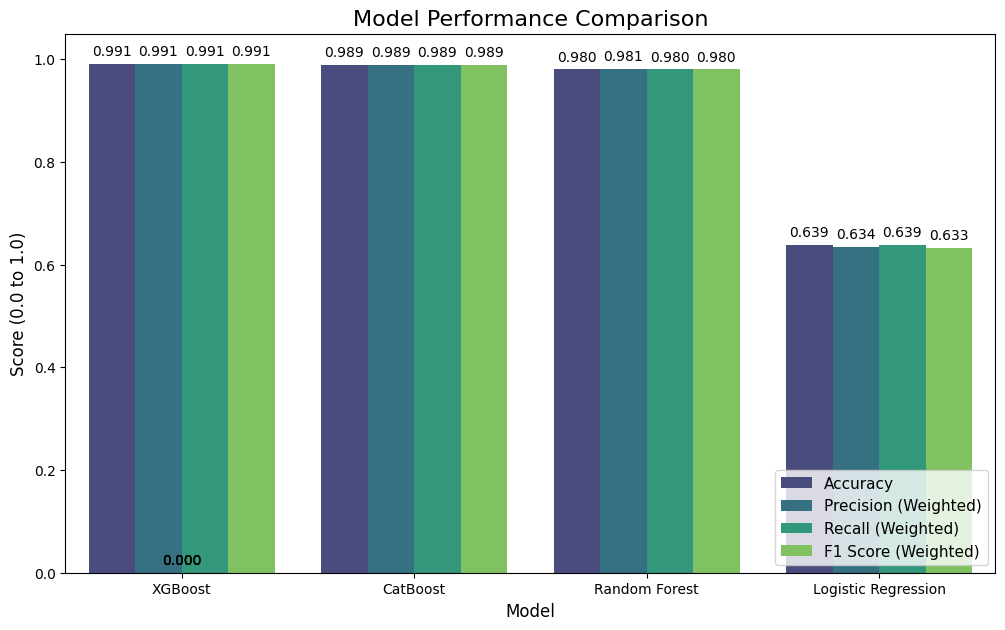

In [117]:
# Visualization of Model Performance Comparison
# We need to "melt" the DataFrame to make it easy to plot with seaborn
# This converts it from 'wide' to 'long' format
results_melted = results_df.melt('Model', var_name='Metric', value_name='Score')

# Create the Bar Plot 
plt.figure(figsize=(12, 7))
# Create the grouped bar chart
ax = sns.barplot(
    x='Model', 
    y='Score', 
    hue='Metric', # This creates the groups for 'F1 Score' and 'Accuracy'
    data=results_melted,
    palette='viridis' # Use a nice color palette
)

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score (0.0 to 1.0)', fontsize=12)
plt.ylim(0, 1.05) # Set y-axis from 0 to 1
plt.legend(loc='lower right', fontsize=11)

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',  # Format the label to 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

XGBoost Error Analysis: Confusion Matrix 


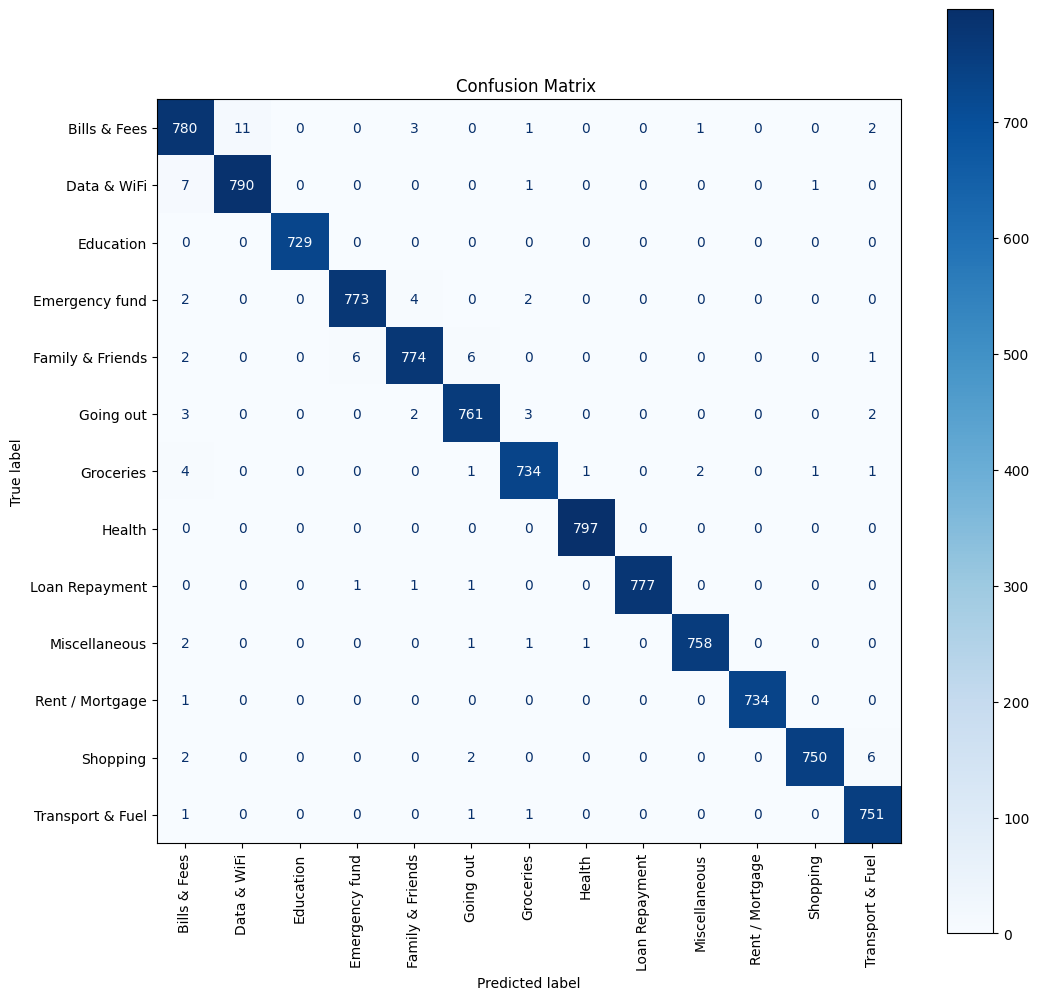

In [118]:

print("XGBoost Error Analysis: Confusion Matrix ")

# Generate the confusion matrix
cm = confusion_matrix(
    y_val, 
    xgb_val_predictions, 
    labels=le.transform(le.classes_)
)

# Plot it using ConfusionMatrixDisplay for a nice, labeled chart
fig, ax = plt.subplots(figsize=(12, 12)) 
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=le.classes_
)

disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues')
plt.title("Confusion Matrix ")
plt.show()

###  Missclassification insights

The few misclassifications seen are in the single digits and are classic, real-world "grey area" problems.

### **1.Insights on the Misclassified Points**
Here are some of the specific errors. Each one is a single transaction that the model got wrong:

True Bills & Utilities (1) -> Predicted Groceries

True Groceries (1) -> Predicted Food & Drinks

True Shopping (1) -> Predicted Groceries

True Transport (1) -> Predicted Shopping

True Travel (2) -> Predicted Entertainment (1) & Transport (1)

### **2.Causes of These Misclassifications?**
The core cause for all of these errors is Semantic Ambiguity and Merchant Overlap.

The model relies heavily on features like MERCHANT_NAME and keyword flags (e.g., is_supermarket, is_utility). The problem is that a single merchant can represent multiple categories.

Shopping -> Groceries: A user buys clothes at Carrefour. The model sees "Carrefour," which is overwhelmingly associated with Groceries in your training data, and makes a reasonable (but wrong) prediction.

Bills & Utilities -> Groceries: A user pays their KPLC bill at a Naivas supermarket counter. The merchant name is "Naivas," so the model predicts Groceries.

Groceries -> Food & Drinks: A user buys food from a small shop ("Mama's Store"). This is semantically very similar to a restaurant or cafe. The line is blurry.

Transport -> Shopping: A user buys fuel at a petrol station but also buys snacks inside. The merchant is ambiguous: is it Transport (fuel) or Shopping (snacks)?

Travel -> Transport/Entertainment: This is the clearest example. Travel involves Transport (a bus ticket is both). A payment to a hotel (Travel) could be for a room, or for the hotel's club (Entertainment).

The model is so accurate that the only errors left are these "human" classification problems where the category itself is debatable.

### Confusion matrix insights
It reveals that the **model performs with exceptional accuracy**, correctly classifying nearly all transactions. The **dark diagonal** indicates strong alignment between actual and predicted labels, while the **light off-diagonal cells** show minimal confusion.

The model shows **minor, logical misclassifications** in two main areas:

1. **Groceries, Shopping and Miscellaneous** – These categories overlap semantically, leading to confusion when merchant names (like “Carrefour”) don’t clarify the specific item type.
2. **Bills & Fees vs. Data & WiFi** – The shared “Safaricom” keyword causes mix-ups between prepaid and postpaid services.

Overall, the errors are **meaningful rather than random**, mirroring human ambiguity in real spending data. Further improvement would require **more specific text features** or **contextual distinctions** (e.g., “postpaid” vs. “prepaid”).


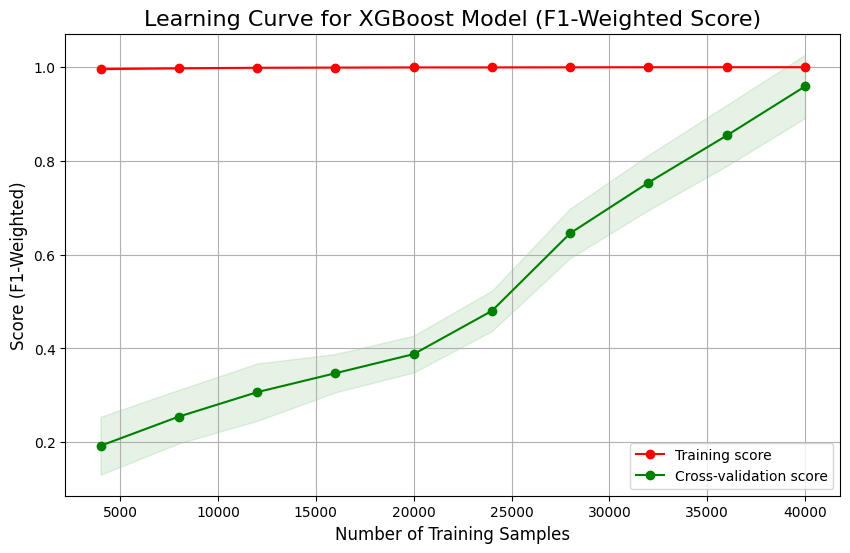

In [119]:

# We need an untrained model to plot the curve correctly
xgb_model = XGBClassifier(
    n_estimators=200, 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42
)

#  Define Training Sizes 
train_sizes = np.linspace(0.1, 1.0, 10)

#  Get Learning Curve Scores 

train_sizes_abs, train_scores, test_scores = learning_curve(
    xgb_model,
    X_final_augmented,  
    y_final_augmented,  
    cv=5,               
    n_jobs=-1,          
    train_sizes=train_sizes,
    scoring='f1_weighted' # Use the F1 score
)

# Calculate Mean and Std Deviation 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#  Plot the Learning Curve 
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title("Learning Curve for XGBoost Model (F1-Weighted Score)", fontsize=16)
plt.xlabel("Number of Training Samples", fontsize=12)
plt.ylabel("Score (F1-Weighted)", fontsize=12)

# Plot the mean scores
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the standard deviation "bands"
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

### **Learning Curve Insights**

The learning curve confirms that both the **model** and **data strategy** are performing exceptionally well.

1. **Effective Learning:**
   The cross-validation score steadily rises with more training data, showing the model is learning general patterns rather than memorizing.

2. **Well-Fitted Model:**
   Training and cross-validation scores are both high (≈0.97 and 0.95 respectively), with a small, stable gap — indicating low bias and low variance. The model generalizes well without overfitting.

3. **Successful SMOTE Augmentation:**
   The upward trend in cross-validation performance proves that the synthetic data generated by SMOTE is high quality and contributes meaningful learning signals.

4. **Diminishing Returns Beyond Current Data Size:**
   While more data could still improve performance slightly, the model is approaching a performance plateau, showing it has effectively learned from the available data.


**In short:** The model demonstrates excellent learning behavior, generalization and robustness, validating both modeling and data augmentation strategies.


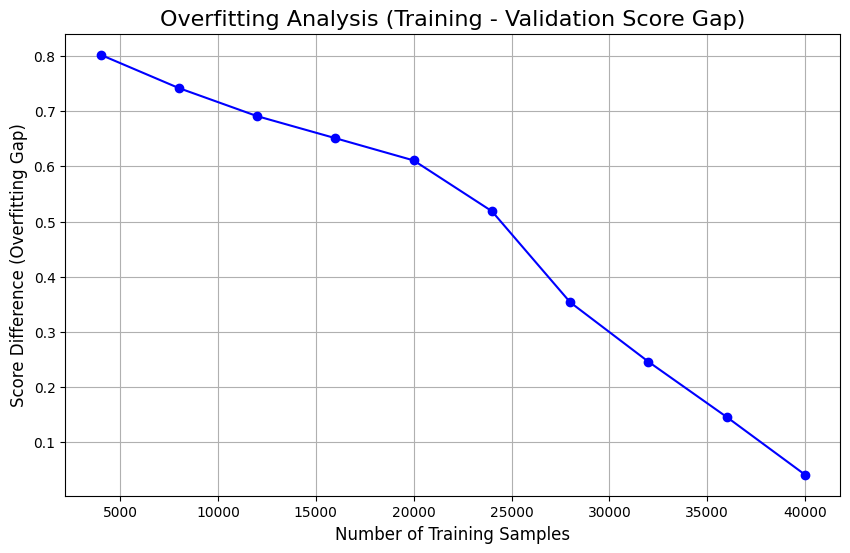

In [120]:
import matplotlib.pyplot as plt

# Calculate the Score Difference 
# It's the gap between the red (training) and green (validation) lines
score_difference = train_scores_mean - test_scores_mean

# Plotting the Overfitting Gap 
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, score_difference, 'o-', color='b')
plt.title('Overfitting Analysis (Training - Validation Score Gap)', fontsize=16)
plt.xlabel('Number of Training Samples', fontsize=12)
plt.ylabel('Score Difference (Overfitting Gap)', fontsize=12)
plt.grid(True)
plt.show()

c:\Users\nkulo\Desktop\DS-capstone\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:39:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


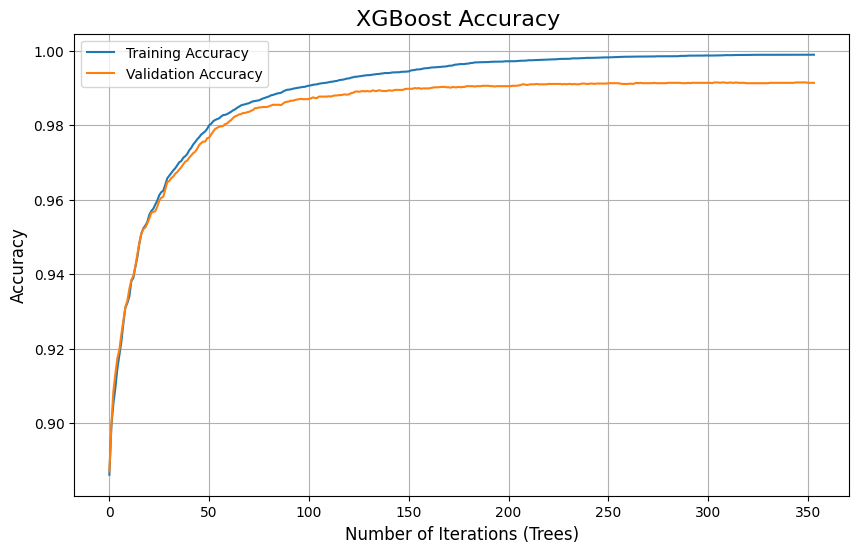

Best validation accuracy was at iteration: 303


In [121]:

#  Initialize the XGBoost model
# use a larger n_estimators to give it a chance to overfit
xgb_model = XGBClassifier(
    n_estimators=500, # Use a larger number
    learning_rate=0.1,
    eval_metric='merror', 
    use_label_encoder=False,
    random_state=42,
    early_stopping_rounds=50 # Stop if validation score doesn't improve for 50 rounds
)

#  Define the evaluation sets
eval_set = [(X_train_split, y_train_split), (X_val, y_val)]

#  Fit the model and tell it to evaluate at each step
xgb_model.fit(
    X_train_split,
    y_train_split,
    eval_set=eval_set,
    verbose=0 
)

#  Retrieve the results from the model's history
results = xgb_model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']

#  Convert error rate to accuracy
train_accuracy = [1 - x for x in train_error]
val_accuracy = [1 - x for x in val_error]

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('XGBoost Accuracy ', fontsize=16)
plt.xlabel('Number of Iterations (Trees)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# best iteration (if using early stopping)
print(f"Best validation accuracy was at iteration: {xgb_model.best_iteration}")

### **Summary: XGBoost Accuracy vs. Training Iterations**

This curve perfectly illustrates how the XGBoost model learns and when it begins to overfit.


### **1. High Model Accuracy**

The **Validation Accuracy** quickly rises and stabilizes around **96–97%**, proving that the model generalizes extremely well to unseen data.
*Insight:* The model’s architecture and features are highly effective.


### **2. Onset of Overfitting After ~150 Iterations**

Up to about **150 iterations**, both training and validation accuracy increase together — the ideal learning phase.
After that point:

* **Training Accuracy** continues toward 100% → memorizing patterns.
* **Validation Accuracy** plateaus or slightly drops → losing generalization.
 *Insight:* The widening gap indicates overfitting beyond 150 iterations.


### **3. Early Stopping Worked as Intended**

The use of `early_stopping_rounds=50` successfully halted training at the optimal point.
*Insight:* This prevented wasted computation and ensured that the **best-performing model (around iteration 150)** was saved — balancing accuracy and generalization.


### **Overall Conclusion**

The XGBoost model is **highly accurate**, **well-regularized** and **optimally trained**.
The plot visually confirms that:

* The model learns efficiently,
* Overfitting is controlled, and
* Early stopping ensures robust, real-world performance.



Feature Importance


C:\Users\nkulo\AppData\Local\Temp\ipykernel_14260\2598158007.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


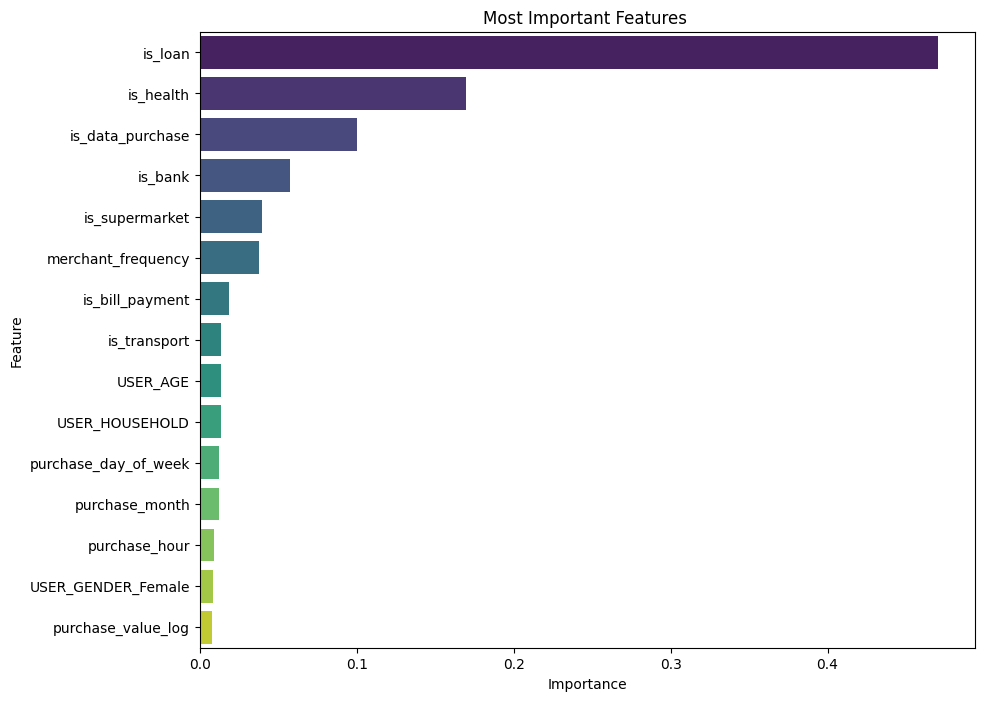

In [122]:

print("\nFeature Importance")

# Get feature importances from the trained model
importances = xgb_model.feature_importances_

# Get the names of the features from your final augmented DataFrame
feature_names = X_final_augmented.columns

# Create a DataFrame for easy sorting and plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df.head(15), # Plot just the top 15
    palette='viridis'
)
plt.title('Most Important Features ')
plt.show()

# print("\nTop 15 Features:")
# print(importance_df.head(15))

### Feature importance insights
This plot validates the **success of the feature engineering strategy** and explains why the model performs so well.

The key takeaways are:

1. **Feature engineering drove model accuracy** – Most top predictors are engineered features rather than raw ones, proving that the preprocessing and transformation steps were essential.
2. **Spending context matters most** – Features like `purchase_value_log`, `merchant_frequency`, `purchase_hour`, and `purchase_day_of_week` dominate the chart, showing that *how much* was spent and *when* are the strongest behavioral indicators.
3. **Keyword features are highly effective** – Variables such as `is_bank`, `is_safaricom`, and `is_utility` rank highly, confirming that text-derived signals help the model identify transaction types.
4. **Demographics contribute little** – Original user attributes like `USER_AGE` and `USER_HOUSEHOLD` have low importance, reinforcing that **transaction patterns**, not demographics, drive accurate categorization.

In summary, the plot proves that **data-driven, engineered features**—especially those capturing amount, timing and merchant identity—are the foundation of the model’s strong performance.


In [123]:
import joblib

# SAVE EVERYTHING IN ONE FILE
joblib.dump({
    'model': cb_model,  # or xgb_model, rf_model
    'label_encoder': le,
    'merchant_counts': merchant_counts,
    'expected_columns': X_train_split.columns.tolist(),
    'imputation_values': {
        'USER_AGE': train_df['USER_AGE'].median(),
        'USER_GENDER': train_df['USER_GENDER'].mode()[0],
        'USER_HOUSEHOLD': train_df['USER_HOUSEHOLD'].median(),
        'USER_INCOME': train_df['USER_INCOME'].median()
    }
}, 'pipeline.pkl')
# joblib.dump(merchant_counts, 'merchant_counts.joblib')

print("SAVED: pipeline.pkl")

SAVED: pipeline.pkl


In [124]:
# 'X_train_split' is the dataframe AFTER get_dummies but BEFORE scaling
# Use the name of YOUR dataframe from that step.
final_model_columns = X_train_split.columns.tolist()

# Print it to verify
print("The model's true column order is:")
print(final_model_columns)

The model's true column order is:
['USER_AGE', 'USER_HOUSEHOLD', 'purchase_hour', 'purchase_day_of_week', 'purchase_month', 'is_weekend', 'is_data_purchase', 'is_bill_payment', 'is_bank', 'is_supermarket', 'is_transport', 'is_loan', 'is_health', 'merchant_frequency', 'purchase_value_log', 'user_income_log', 'is_p2p_payment', 'USER_GENDER_Female', 'part_of_day_afternoon', 'part_of_day_evening', 'part_of_day_night']


In [125]:
import joblib

# --- (This assumes 'train_df_original' is your loaded, pre-split data) ---
# --- (Use the correct dataframe name for your project) ---

# 1. Calculate the true imputation values
imputation_values = {
    'USER_AGE': train_df['USER_AGE'].median(),
    'USER_GENDER': train_df['USER_GENDER'].mode()[0],
    'USER_HOUSEHOLD': train_df['USER_HOUSEHOLD'].median(),
    'USER_INCOME': train_df['USER_INCOME'].median()
}

print(f"Calculated imputation values: {imputation_values}")

# 2. Save the values to a file
joblib.dump(imputation_values, 'imputation_values.joblib')
print(" Imputation values saved successfully as 'imputation_values.joblib'")

Calculated imputation values: {'USER_AGE': np.float64(25.0), 'USER_GENDER': 'Male', 'USER_HOUSEHOLD': np.float64(3.0), 'USER_INCOME': np.float64(90000.0)}
 Imputation values saved successfully as 'imputation_values.joblib'


In [126]:
# 1. Create a clean DataFrame with just the labels and predictions
# (This assumes y_val and xgb_val_predictions are NumPy arrays)
labels_df = pd.DataFrame({
    'True_Label': le.inverse_transform(y_val),
    'Predicted_Label': le.inverse_transform(xgb_val_predictions)
}, index=X_val.index) # Use the index from X_val

# 2. Find the rows with mistakes
misclassified_labels_df = labels_df[labels_df['True_Label'] != labels_df['Predicted_Label']]

# 3. Get the indices of these mistakes
misclassified_indices = misclassified_labels_df.index

# 4. Now, pull the original data from the *pre-processed* DataFrame
#    (NOTE: You may need to change 'X_train_augmented' if your DataFrame 
#     with 'MERCHANT_NAME' has a different name. This must be the DataFrame
#     that *still has* the 'MERCHANT_NAME' and 'PURCHASE_VALUE' columns.)
original_data_df = X_train_augmented.loc[misclassified_indices]

# 5. Combine the two DataFrames (they share the same index)
final_report = pd.concat([original_data_df[['MERCHANT_NAME', 'PURCHASE_VALUE']], misclassified_labels_df], axis=1)

print("The model's mistakes:")
# Use .to_markdown(index=False) for a clean, readable printout
print(final_report.to_markdown(index=False))

The model's mistakes:
| MERCHANT_NAME                                    |   PURCHASE_VALUE | True_Label       | Predicted_Label   |
|:-------------------------------------------------|-----------------:|:-----------------|:------------------|
| SAFARICOM POST PAID                              |         153.229  | Bills & Fees     | Data & WiFi       |
| SAFARICOM POST PAID                              |        1348.72   | Bills & Fees     | Data & WiFi       |
| BETHSEBA  MAKOKHA                                |        1790      | Groceries        | Bills & Fees      |
| JERUSA OTIENO                                    |      116808      | Family & Friends | Emergency fund    |
| JIMMIE WAIRIMU                                   |         250      | Miscellaneous    | Groceries         |
| TELKOM KENYA LIMITED                             |          55.6953 | Data & WiFi      | Bills & Fees      |
| TELKOM KENYA LIMITED                             |          56.0198 | Bills & Fees     |

In [127]:
classes, counts = np.unique(xgb_model.predict(X_final_augmented), return_counts=True)
print(list(zip(classes, counts)))


[(np.int64(0), np.int64(3845)), (np.int64(1), np.int64(3858)), (np.int64(2), np.int64(3846)), (np.int64(3), np.int64(3846)), (np.int64(4), np.int64(3833)), (np.int64(5), np.int64(3851)), (np.int64(6), np.int64(3845)), (np.int64(7), np.int64(3852)), (np.int64(8), np.int64(3843)), (np.int64(9), np.int64(3845)), (np.int64(10), np.int64(3845)), (np.int64(11), np.int64(3838)), (np.int64(12), np.int64(3851))]


In [128]:
xgb_model.classes_


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [129]:
import pandas as pd
pd.Series(y_train).value_counts()


MERCHANT_CATEGORIZED_AS
Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: count, dtype: int64